Comprehensive, Multi-Source Cyber-Security Events

This data set represents 58 consecutive days of de-identified event data collected from five sources within Los Alamos National Laboratory’s corporate, internal computer network.

The data sources include Windows-based authentication events from both individual computers and centralized Active Directory domain controller servers; process start and stop events from individual Windows computers; Domain Name Service (DNS) lookups as collected on internal DNS servers; network flow data as collected on at several key router locations; and a set of well-defined red teaming events that present bad behavior within the 58 days. In total, the data set is approximately 12 gigabytes compressed across the five data elements and presents 1,648,275,307 events in total for 12,425 users, 17,684 computers, and 62,974 processes.

Specific users that are well known system related (SYSTEM, Local Service) were not de-identified though any well-known administrators account were still de-identified. In the network flow data, well-known ports (e.g. 80, 443, etc) were not de-identified. All other users, computers, process, ports, times, and other details were de-identified as a unified set across all the data elements (e.g. U1 is the same U1 in all of the data). The specific timeframe used is not disclosed for security purposes. In addition, no data that allows association outside of LANL’s network is included. All data starts with a time epoch of 1 using a time resolution of 1 second. In the authentication data, failed authentication events are only included for users that had a successful authentication event somewhere within the data set.

Individual File Descriptions

auth.txt.gz

This data represents authentication events collected from individual Windows-based desktop computers, servers, and Active Directory servers. Each event is on a separate line in the form of "time,source user@domain,destination user@domain,source computer,destination computer,authentication type,logon type,authentication orientation,success/failure" and represents an authentication event at the given time. The values are comma delimited and any fields that do not have a valid value are represented as a question mark ('?').

Here are three lines from the data as an example:

1,C625@𝐷𝑂𝑀1,𝑈147@𝐷𝑂𝑀1,𝐶625,𝐶625,𝑁𝑒𝑔𝑜𝑡𝑖𝑎𝑡𝑒,𝐵𝑎𝑡𝑐ℎ,𝐿𝑜𝑔𝑂𝑛,𝑆𝑢𝑐𝑐𝑒𝑠𝑠1,𝐶653

@DOM1,SYSTEM@C653,C653,C653,Negotiate,Service,LogOn,Success 1,C660$@DOM1,SYSTEM@C660,C660,C660,Negotiate,Service,LogOn,Success

proc.txt.gz

This data represents process start and stop events collected from individual Windows-based desktop computers and servers. Each event is on a separate line in the form of "time,user@domain,computer,process name,start/end" and represents a process event at the given time. The values are comma delimited and any fields that do not have a valid value are presented as a question mark ('?').

Here are three lines from the data as an example:

1,C553@𝐷𝑂𝑀1,𝐶553,𝑃16,𝑆𝑡𝑎𝑟𝑡1,𝐶553

@DOM1,C553,P25,End 1,C553$@DOM1,C553,P25,Start

flows.txt.gz

This data presents network flow events collected from central routers within the network. Each event is on a separate line in the form of "time,duration,source computer,source port,destination computer,destination port,protocol,packet count,byte count" and presents a network flow event at the given time and the given duration in seconds. The values are comma delimited and any fields that do not have a valid value are presented as a question mark ('?').

Here are three lines from the data as an example:

1,9,C3090,N10471,C3420,N46,6,3,144 1,9,C3538,N2600,C3371,N46,6,3,144 2,0,C4316,N10199,C5030,443,6,2,92

dns.txt.gz

This data presents Domain Name Service (DNS) lookup events collected from the central DNS servers within the network. Each event is on a separate line in the form of "time,source computer,computer resolved" and presents a DNS lookup at the given time by the source computer for the resolved computer and represents a likely network connection originating from the source computer to the resolved computer. The values are comma delimited and any fields that do not have a valid value are presented as a question mark ('?').

Here are three lines from the data as an example:

31,C161,C2109 35,C5642,C528 38,C3380,C22841

redteam.txt.gz

This data presents specific events taken from the authentication data that present known redteam compromise events. These may be used as ground truth of bad behavior that is different from normal user and computer activity. Each event is on a separate line in the form of "time,user@domain,source computer,destination computer" and presents a compromise event at the given time. The values are comma delimited.

Here are three lines from the data as an example:

151648,U748@DOM1,C17693,C728 151993,U6115@DOM1,C17693,C1173 153792,U636@DOM1,C17693,C294

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# Base location of all data
dataDirectory = 'D:\\LANL\\2015\\'

# timestsamp to enable runtime measurement
start = datetime.now()

# Set the timeSlice to 10 minutes for feature generation
secSlice = 600 

# Variables for calculating the number of seconds in an hour and day
secHour = 3600
secDay = 86400

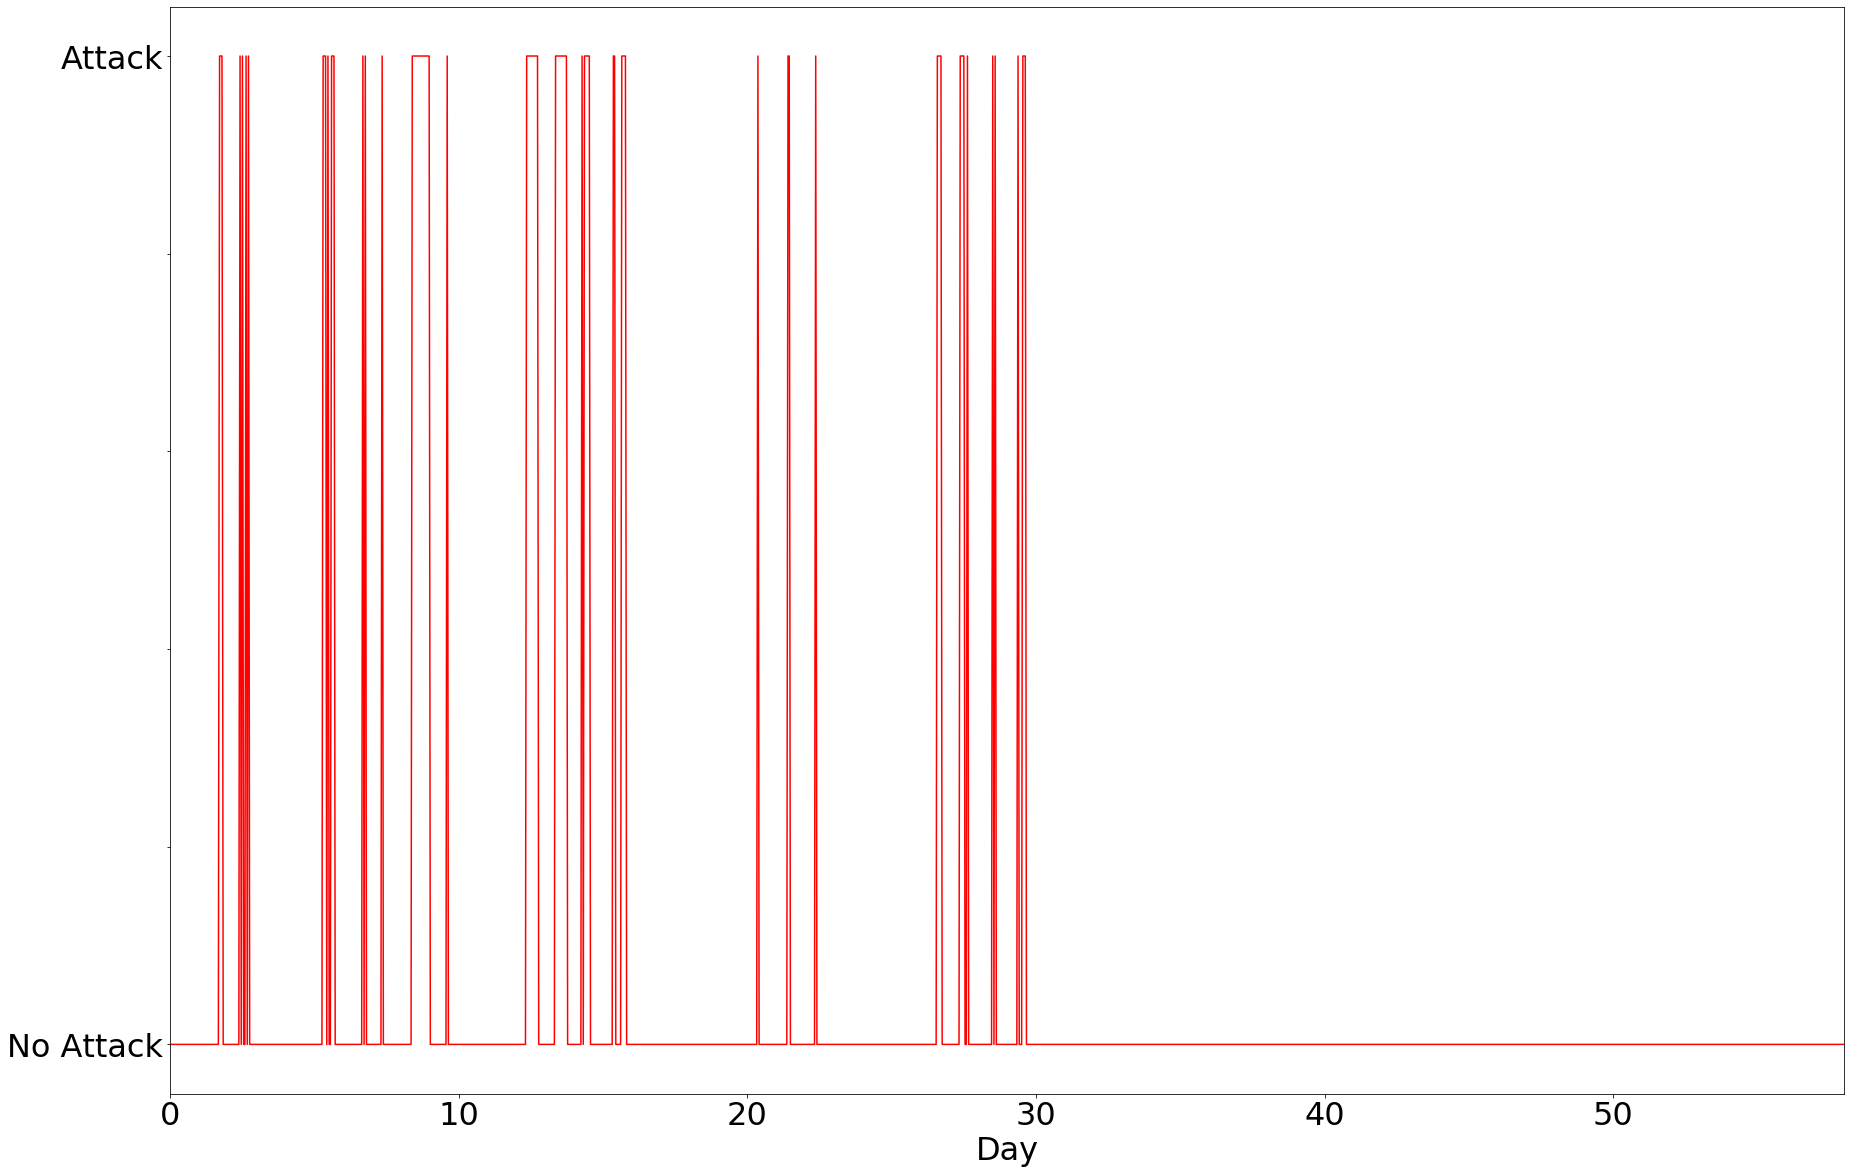

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataDirectory = 'D:\\LANL\\2015\\'
redCols = ['Time', 'User', 'SourceComputer', 'DestComputer']


redDf = pd.read_csv(dataDirectory + 'Raw\\redteam.txt.gz', names=redCols)
redDf['Slice']=redDf.Time.apply(lambda x: int(x/3600))
pltDf = pd.DataFrame(columns=['Slice', 'Attack', 'User'])
y=[]
y_=[]
#x=[]
users=[]

for slice in range (58*24-1):
    try:
        if 'U' in redDf[redDf['Slice']==slice].User.values[0]:
            y.append(1)
            users.append(redDf[redDf['Slice']==slice].User.values[0])
    except:
        y.append(0)
        users.append('')
#    x.append(slice)    
for val in y:
    if val==0:
        y_.append(0)
    else:
        y_.append(1)
    


fig = plt.figure(figsize=(30,20))
x=np.linspace(0,58,len(y))
plt.rcParams.update({'font.size': 32})
ax = plt.axes()

plt.title("")

plt.xlabel("Day")
plt.xlim(right=58)
#plt.ylim(0,58)
#plt.xlim(right=1000)
ax.set_yticklabels(['', 'No Attack', '', '','','','Attack'])

ax.plot(x, y_, linestyle='solid', label='Sample Rate',color='red')

In [3]:
redDf

,Time,User,SourceComputer,DestComputer,Slice
0,150885,U620@DOM1,C17693,C1003,41
1,151036,U748@DOM1,C17693,C305,41
2,151648,U748@DOM1,C17693,C728,42
3,151993,U6115@DOM1,C17693,C1173,42
4,153792,U636@DOM1,C17693,C294,42
...,...,...,...,...,...
744,2552687,U655@DOM1,C17693,C828,709
745,2552687,U655@DOM1,C17693,C828,709
746,2552687,U655@DOM1,C17693,C828,709
747,2552687,U655@DOM1,C17693,C828,709


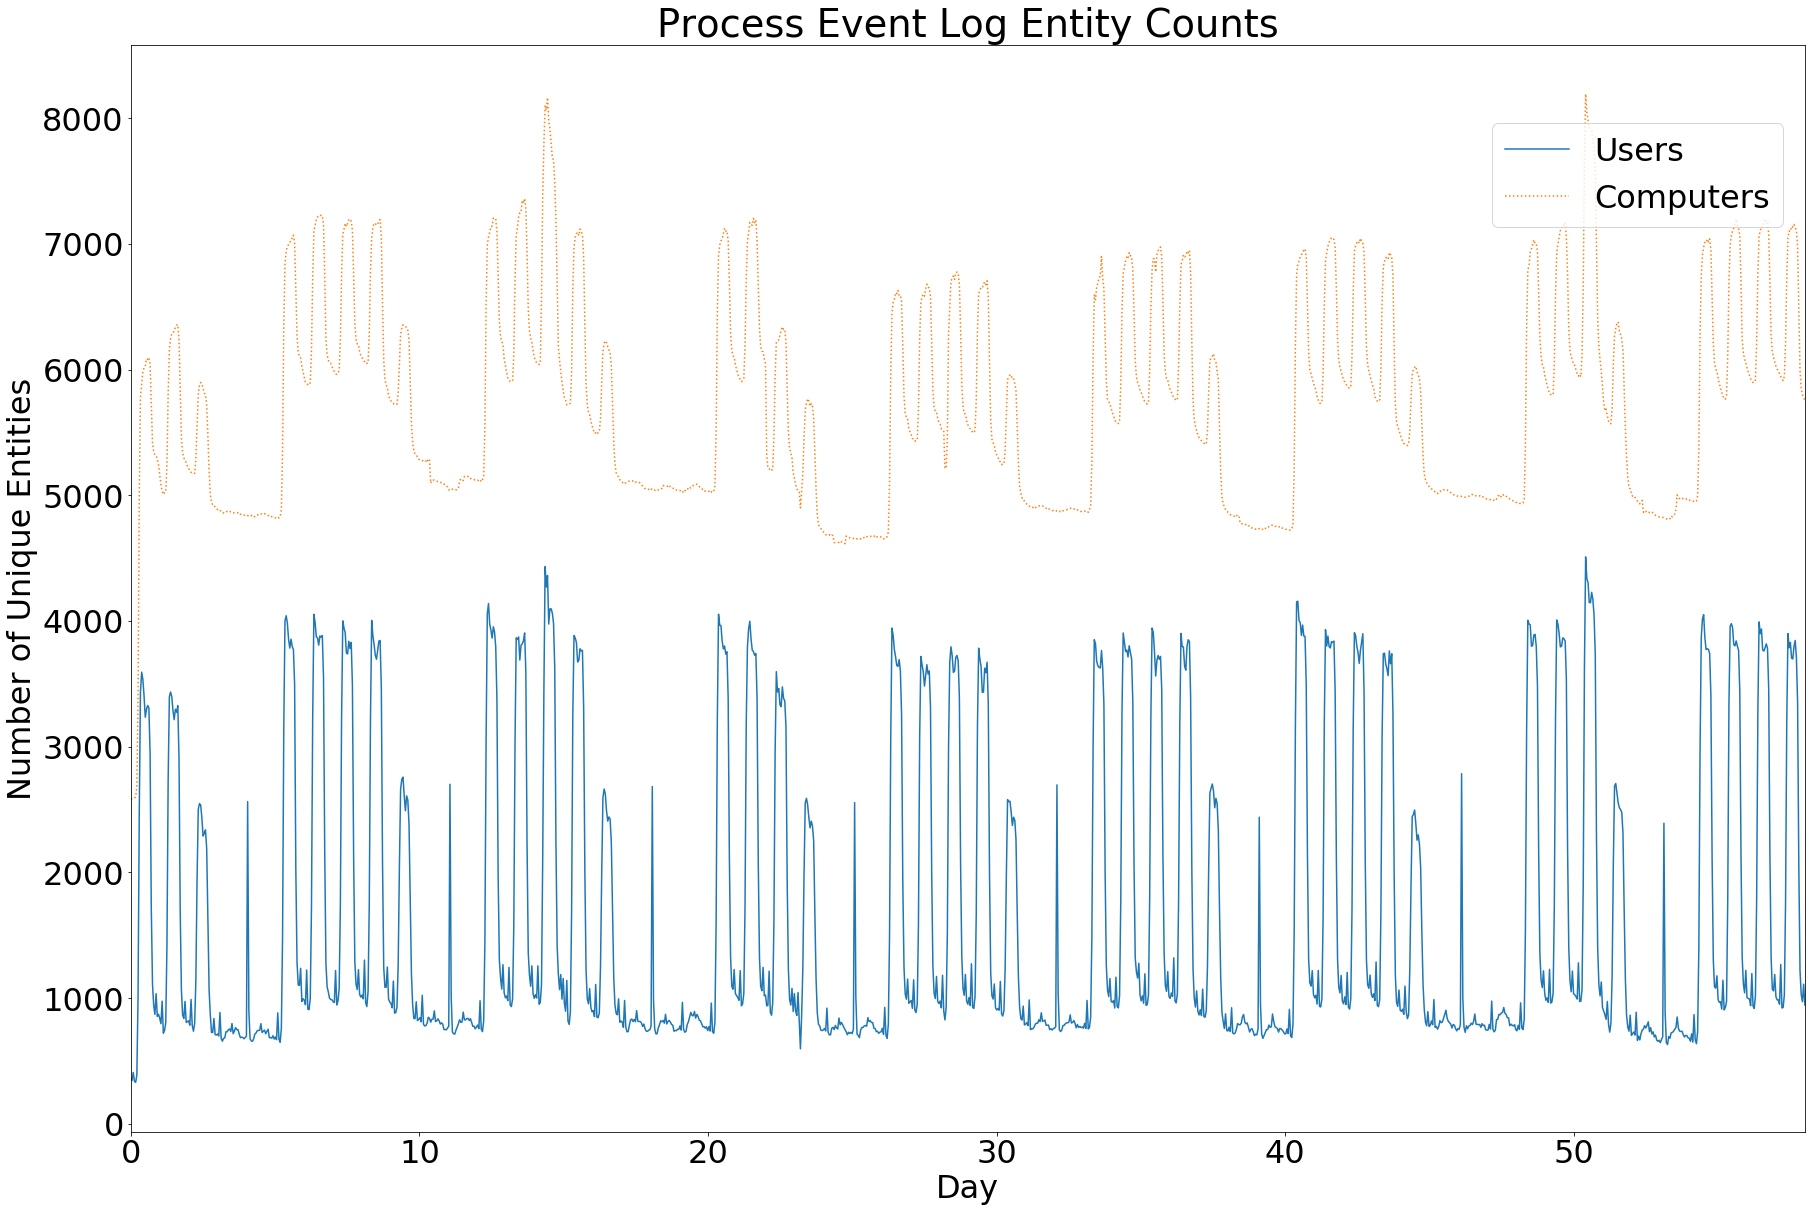

In [4]:

countDf = pd.read_csv(dataDirectory + 'Analysis\\procEntityCounts.csv', index_col=False)

countDf = countDf.groupby(['Time']).agg({'Humans': [np.nanmax], 'Computers': [np.nanmax], 'Processes': [np.nanmax]})

numDays = 58

fig = plt.figure(figsize=(30,20))

plt.rcParams.update({'font.size': 32})
ax = plt.axes()
plt.title("Process Event Log Entity Counts")
plt.ylabel("Number of Unique Entities")
plt.xlabel("Day")
plt.xlim(right=numDays)


y1=countDf['Humans'].values
y2=countDf['Computers'].values
y3=countDf['Processes'].values
x=np.linspace(0,numDays,len(y1))


ax.plot(x, y1, linestyle='solid', label='Users')
ax.plot(x, y2, linestyle='dotted', label='Computers')
#ax.plot(x, y_, linestyle='dashed', label = 'Attacks', color='red')

plt.legend(loc=10, bbox_to_anchor=(0.9,0.88))

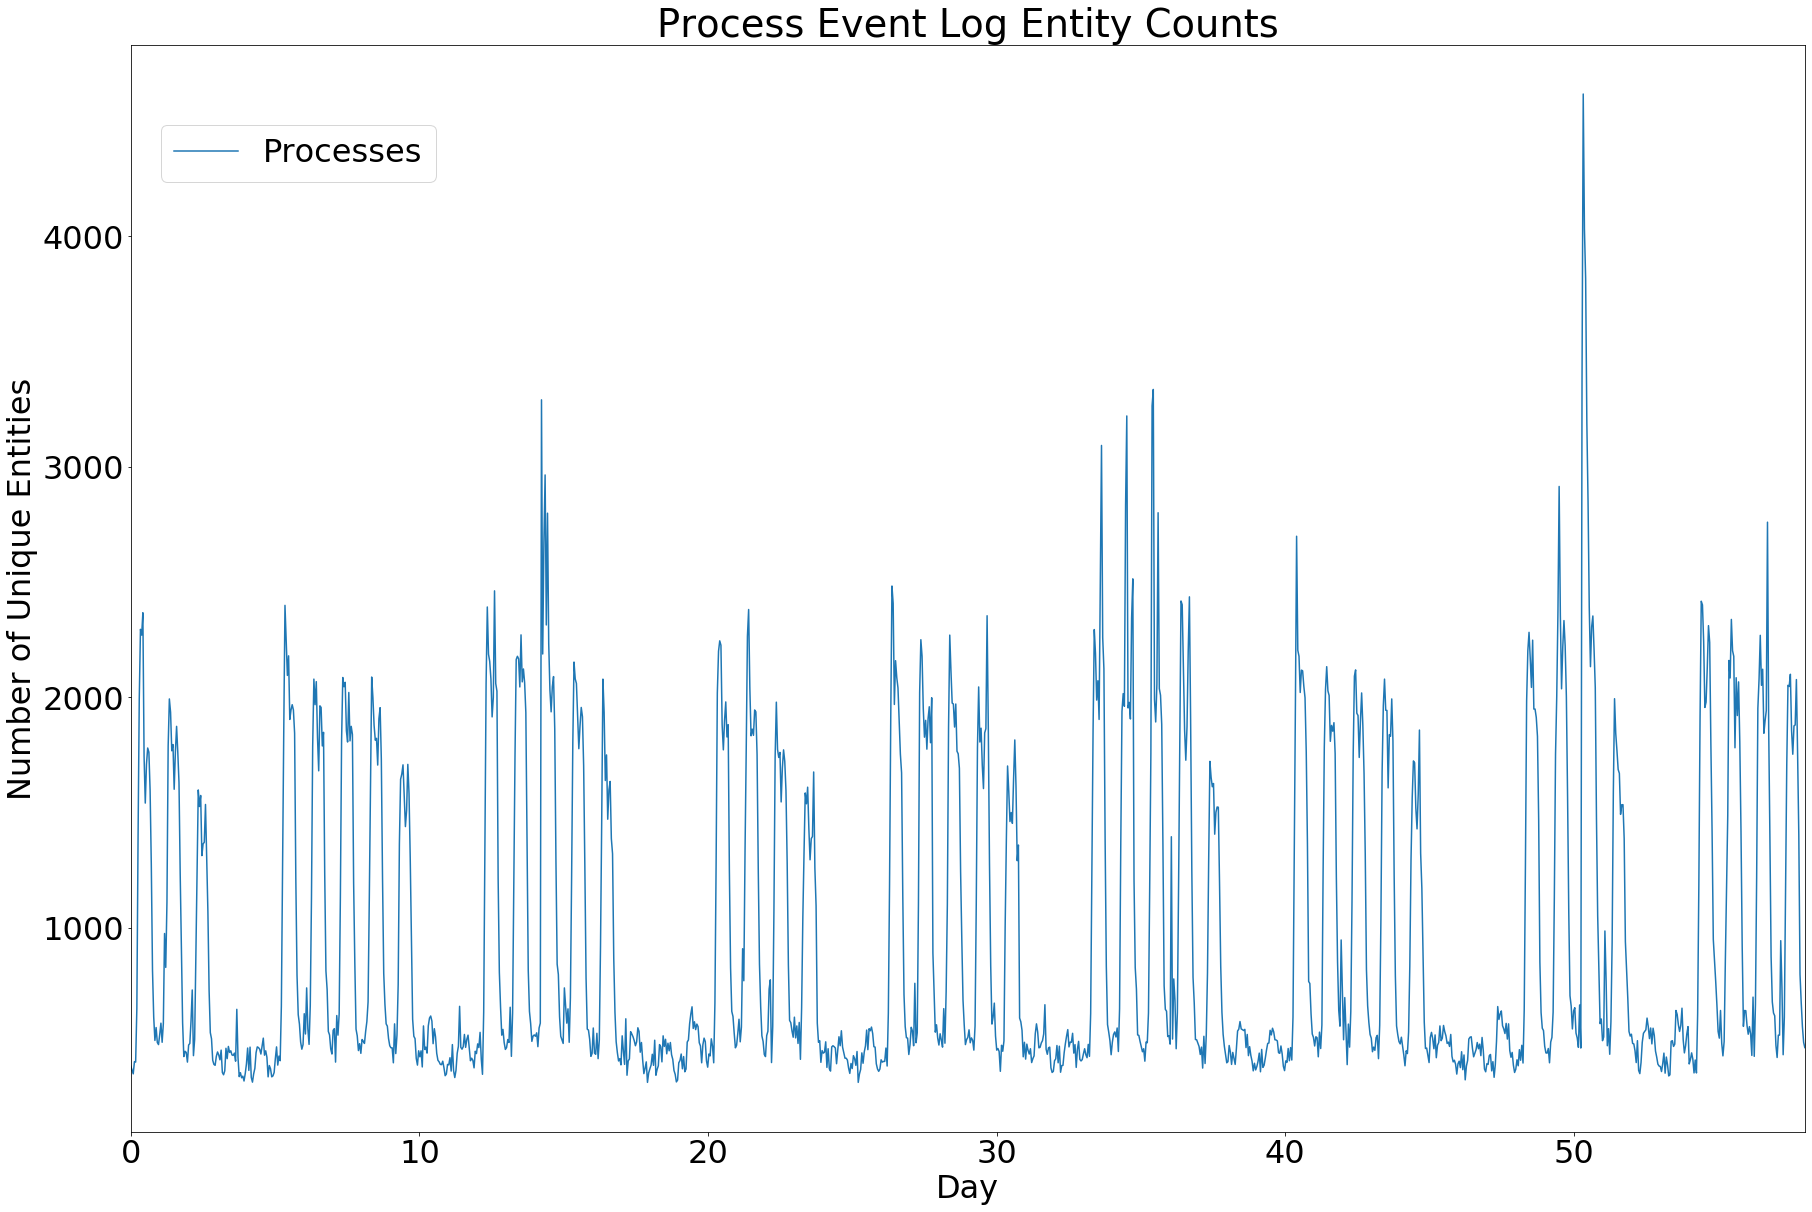

In [5]:

countDf = pd.read_csv(dataDirectory + 'Analysis\\procEntityCounts.csv', index_col=False)

countDf = countDf.groupby(['Time']).agg({'Processes': [np.nanmax]})

numDays = 58

fig = plt.figure(figsize=(30,20))

plt.rcParams.update({'font.size': 32})
ax = plt.axes()
plt.title("Process Event Log Entity Counts")
plt.ylabel("Number of Unique Entities")
plt.xlabel("Day")
plt.xlim(right=numDays)


y1=countDf['Processes'].values
#y2=countDf['Computers'].values
#y3=countDf['Processes'].values
x=np.linspace(0,numDays,len(y1))


ax.plot(x, y1, linestyle='solid', label='Processes')
#ax.plot(x, y2, linestyle='dotted', label='Computers')
#ax.plot(x, y3, linestyle='dashdot', label = 'Processes')

plt.legend(loc=10, bbox_to_anchor=(0.1,0.9))

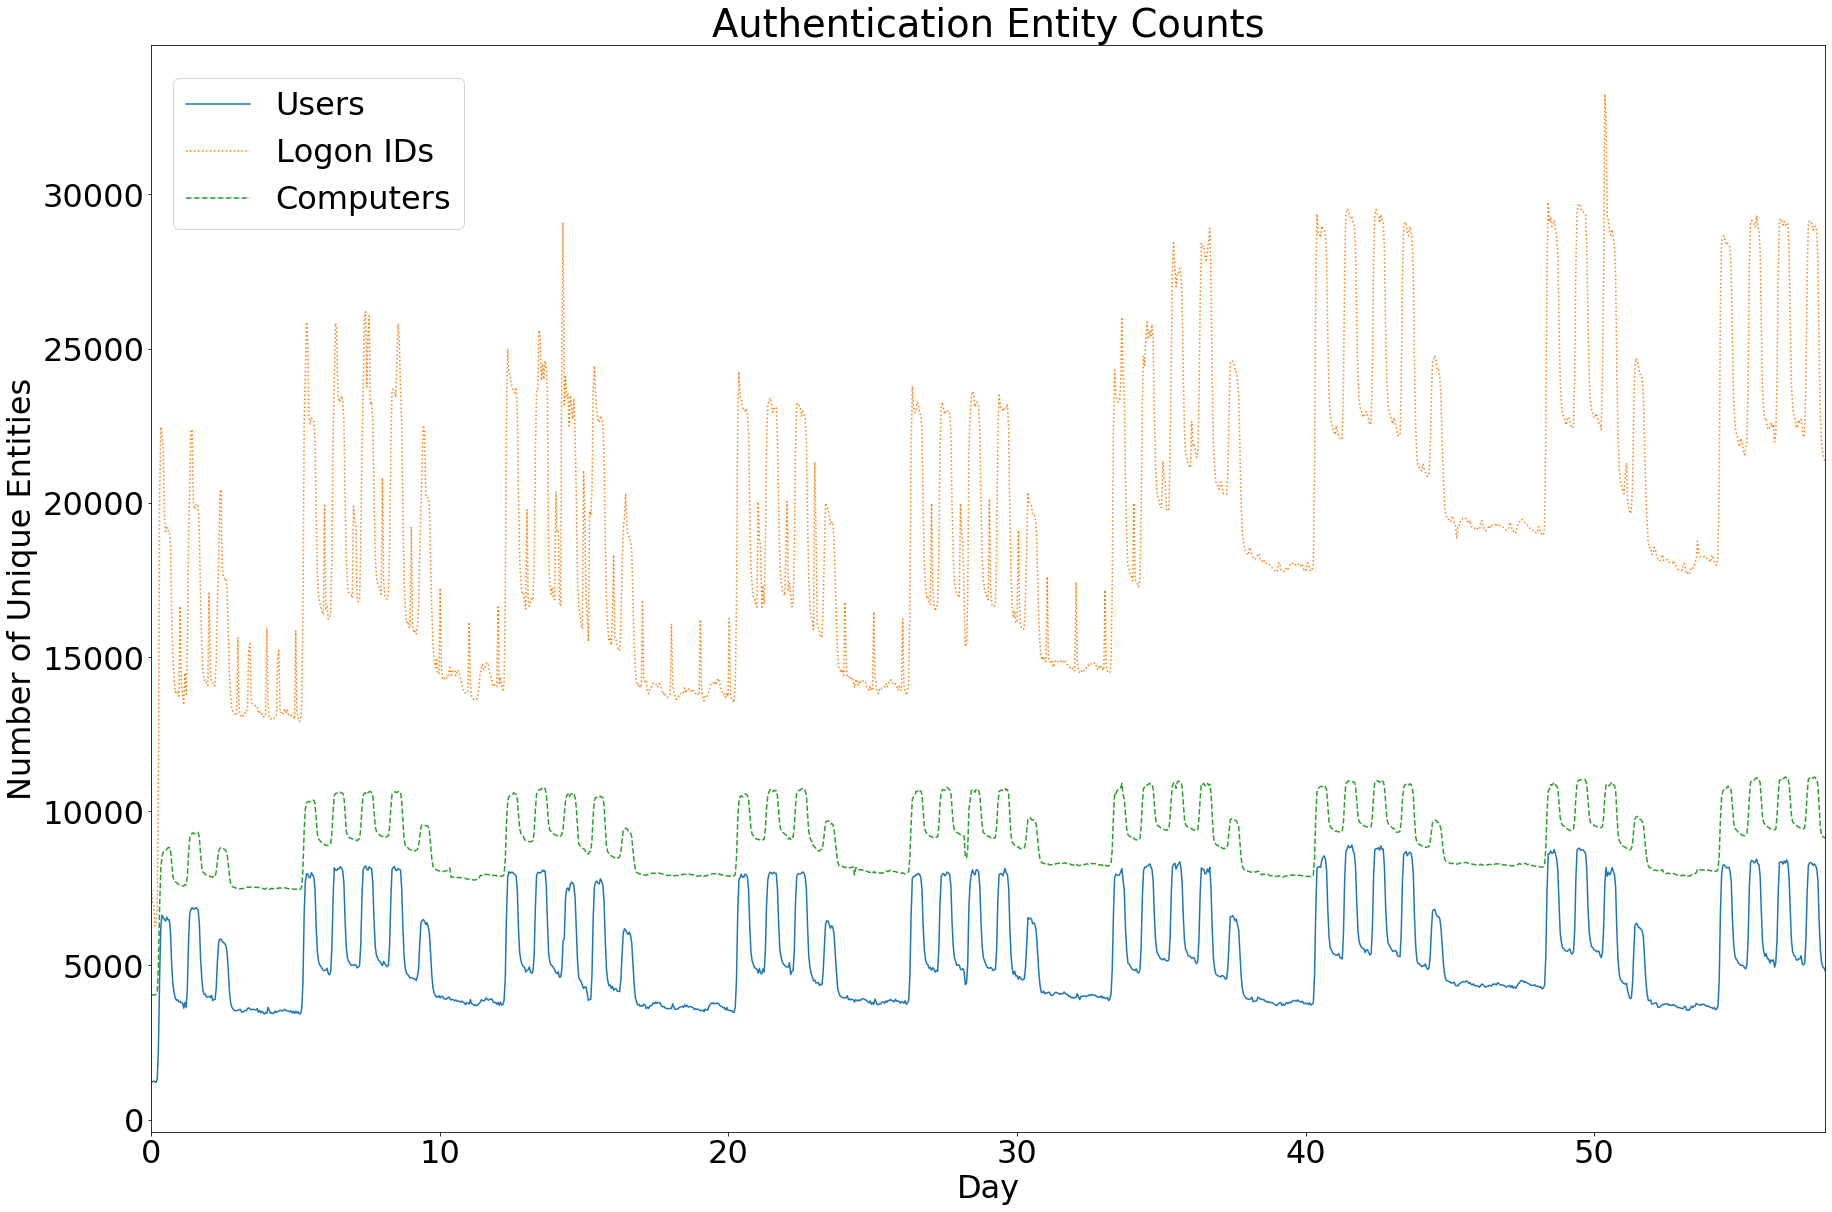

In [6]:
countDf = pd.read_csv(dataDirectory + 'Analysis//authEntityCounts.csv', index_col=False)
countDf = countDf.groupby(['Time']).agg({'Humans': [np.nanmax], 'Dest Users': [np.nanmax], \
                                         'Source Computers': [np.nanmax], 'Dest Computers': [np.nanmax]})


numDays = 58

fig = plt.figure(figsize=(30,20))
ax = plt.axes()
plt.rcParams.update({'font.size': 32})

plt.title("Authentication Entity Counts")
plt.ylabel("Number of Unique Entities")
plt.xlabel("Day")
plt.xlim(right=numDays)

x=np.linspace(0,numDays,len(countDf))

ax.plot(x, countDf['Humans'].values, linestyle='solid', label='Users')
ax.plot(x, countDf['Dest Users'].values, linestyle='dotted', label='Logon IDs')
ax.plot(x, countDf['Source Computers'].values, linestyle='dashed', label='Computers')
#ax.plot(x, y_, linestyle='dashed', label='Attacks', color='red')
#ax.plot(x, countDf['Dest Computers'].values, linestyle='dashdot', label = 'Destination Host')

plt.legend(loc=10, bbox_to_anchor=(0.1,0.9))

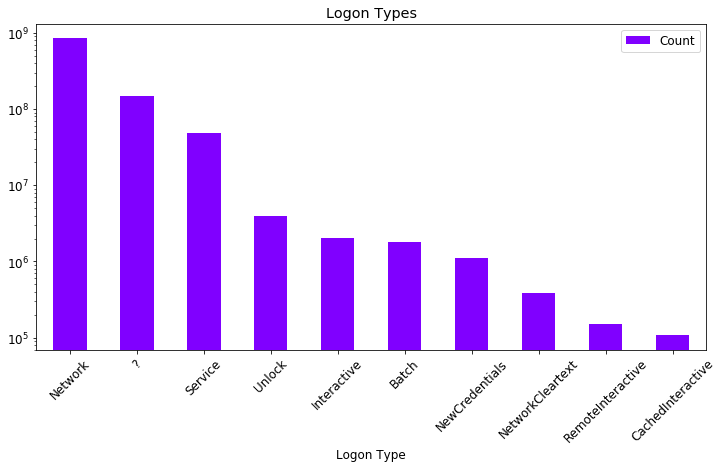

In [7]:
plt.rc('font', size=12)  
countDf = pd.read_csv(dataDirectory + 'Analysis\\logonDensityCounts.csv', index_col=False)
countDf = countDf.groupby('Logon Type').agg({'Count': sum})
countDf = countDf.reset_index()
countDf = countDf.sort_values('Count', axis=0, ascending=False, inplace=False)
countDf.plot(kind='bar', y='Count',x='Logon Type', logy = True, figsize=(12,6), \
             title='Logon Types', rot=45, \
             colormap='rainbow', sort_columns=True)

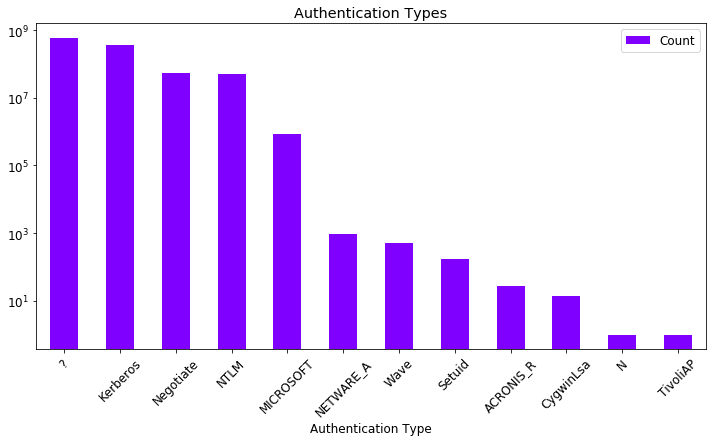

In [8]:
countDf = pd.read_csv(dataDirectory + 'Analysis\\authDensityCounts.csv', index_col=False)

countDf['Authentication Type'] = countDf['Authorisation Type'].apply(lambda x: x[0:9])

countDf = countDf.groupby('Authentication Type').agg({'Count': sum})
countDf = countDf.reset_index()
countDf = countDf.sort_values('Count', axis=0, ascending=False, inplace=False)
countDf.plot(kind='bar', y='Count',x='Authentication Type', logy = True, figsize=(12,6), \
             title='Authentication Types', colormap='rainbow', sort_columns=True, rot=45)

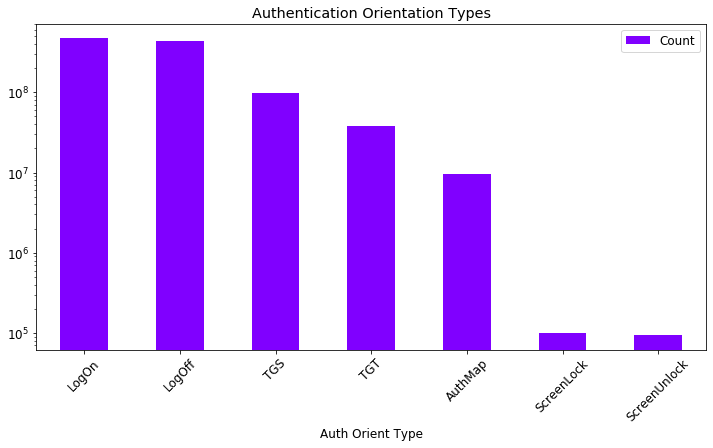

In [9]:
countDf = pd.read_csv(dataDirectory + 'Analysis\\orientDensityCounts.csv', index_col=False)
countDf = countDf.groupby('Auth Orient Type').agg({'Count': sum})
countDf = countDf.reset_index()
countDf = countDf.sort_values('Count', axis=0, ascending=False, inplace=False)
countDf.plot(kind='bar', y='Count',x='Auth Orient Type', logy = True, figsize=(12,6), \
             title='Authentication Orientation Types', rot=45, colormap='rainbow', sort_columns=True)

In [10]:
out.tolist()

NameError: name 'out' is not defined

No handles with labels found to put in legend.


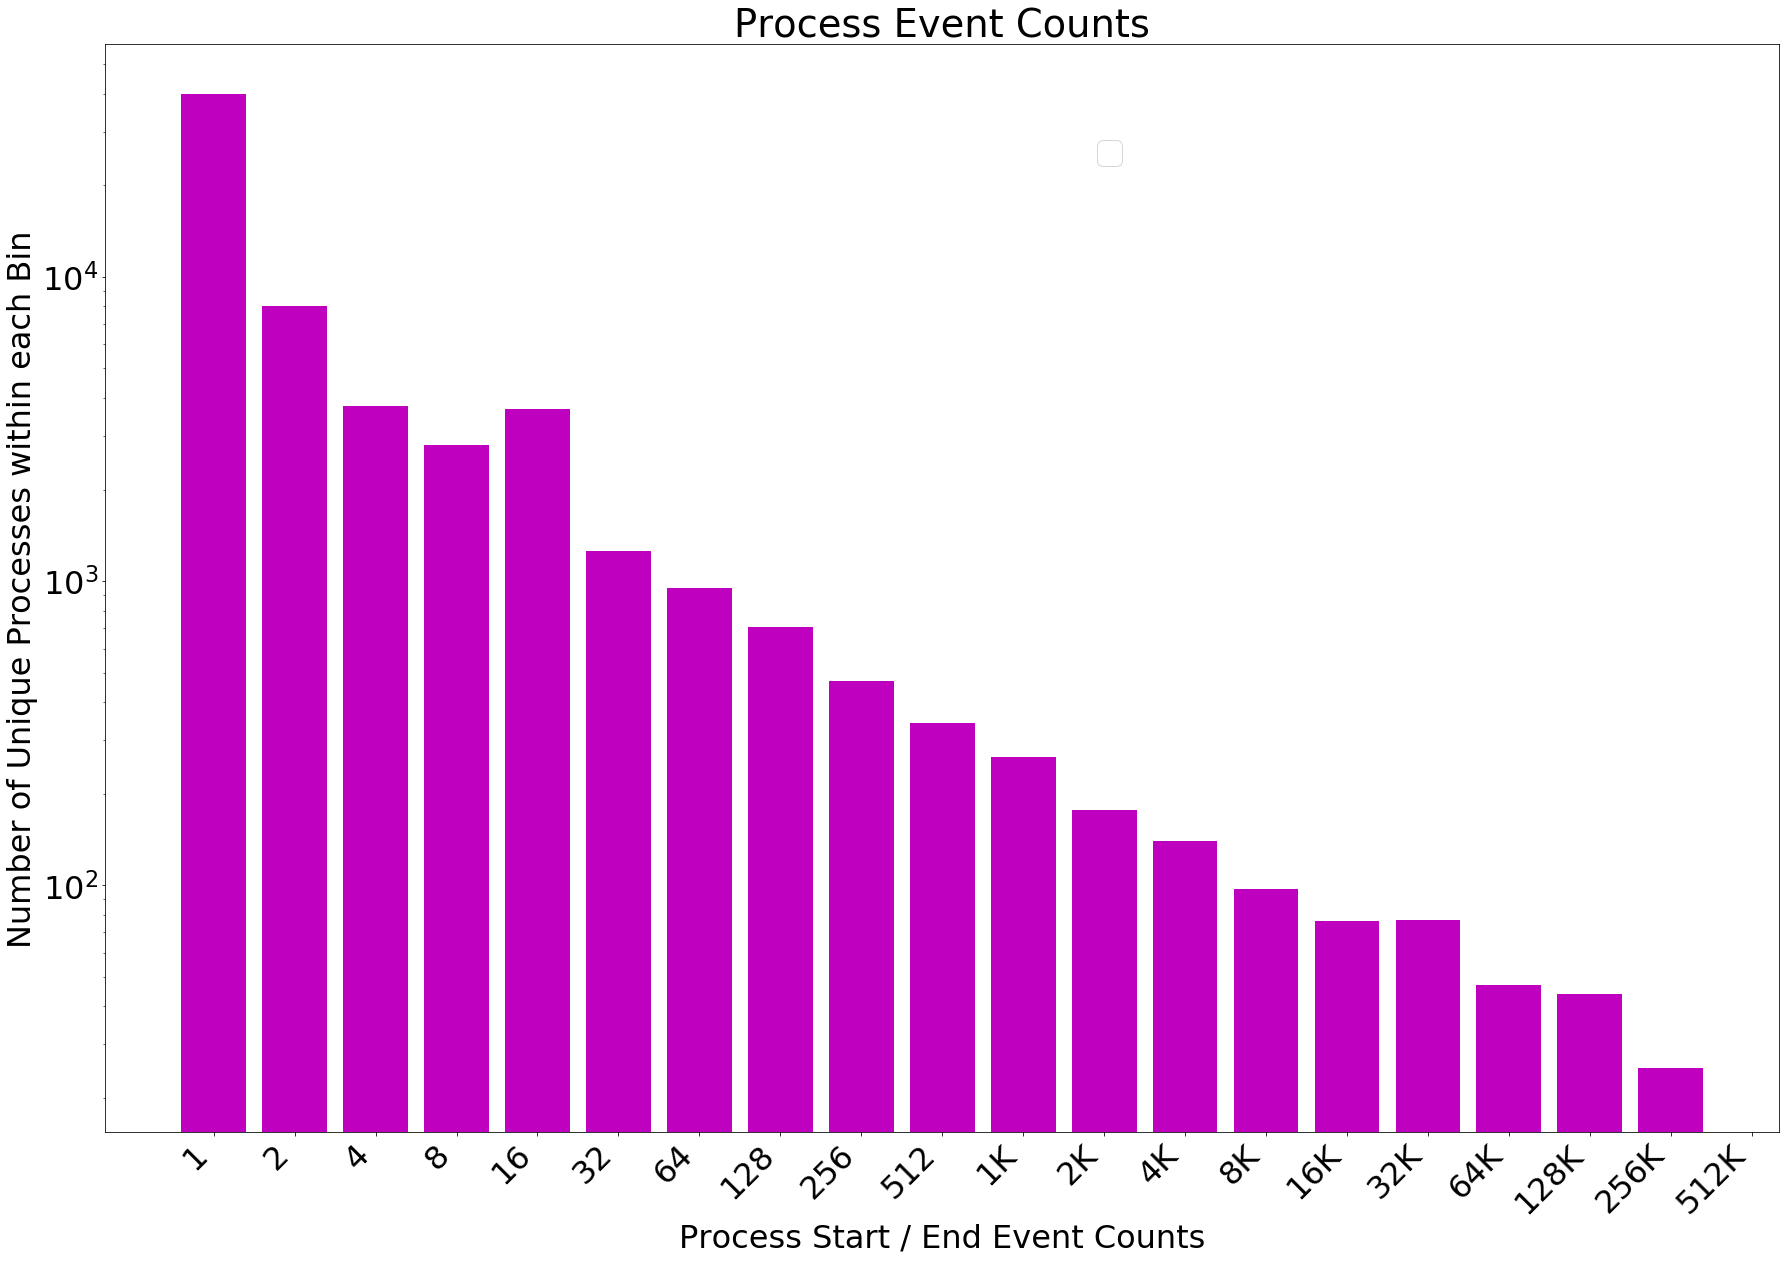

In [42]:
countDf = pd.read_csv(dataDirectory + 'Analysis\\procDensityCounts.csv', index_col=False)
countDf = countDf.groupby('Process Name').agg({'Count': sum})
countDf = countDf.reset_index()
countDf = countDf.sort_values('Count', axis=0, ascending=False, inplace=False)

out = pd.cut(countDf['Count'], bins=[0, 2, 4, 8, 16, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13, \
                                     2**14, 2**15, 2**16, 2**17, 2**18, 2**19, 2**20], include_lowest=True)
bins = ['1', '2', '4', '8', '16', '32','64','128','256','512','1K','2K','4K','8K','16K','32K',\
'64K','128K','256K','512K']
y_=[]
for x in (2**p for p in range(1, 21)):
    y_.append(str(x))
x = np.arange(19)

y= out.value_counts(sort=False)
fig = plt.figure(figsize=(30,20))
plt.yscale('log')
plt.rcParams.update({'font.size': 32})
plt.xlabel("Process Start / End Event Counts")
plt.ylabel("Number of Unique Processes within each Bin")
plt.title('Process Event Counts')
#plt.xticks(range(19), y_, rotation=45, ha='right')
plt.xticks(range(20), bins, rotation=45, ha='right')

#out.value_counts(sort=False).plot(kind='bar', logy = True, figsize=(12,6), \
#              rot=45, colormap='rainbow', sort_columns=True)

plt.bar(x, y.values, color = 'm', width=0.8)

plt.legend(loc=10, bbox_to_anchor=(0.6,0.9))
plt.show()

In [24]:
x

1048576

In [ ]:
# Plot monthly mean values for each year

means = defraData.groupby(['Year','Month']).agg({'Level': [np.nanmean]})
means=means.reset_index()
means.columns=['Year', 'Month', 'Level']

y1=means[means['Year']==2015].Level.values
y2=means[means['Year']==2016].Level.values
y3=means[means['Year']==2017].Level.values
y4=means[means['Year']==2018].Level.values
y5=means[means['Year']==2019].Level.values
y6=means[means['Year']==2020].Level.values

x = np.arange(12)

fig = plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 32})

ax = plt.axes()
plt.title("Plymouth City Centre PM2.5 Mean Levels")
plt.ylabel("PM2.5 level")
plt.xlabel("Month")
plt.xticks(range(12), months, rotation=45, ha='right')

plt.bar(x + 0.00, y1, color = 'b', width=0.1, label='2015')
plt.bar(x + 0.15, y2, color = 'r', width=0.1, label='2016')
plt.bar(x + 0.30, y3, color = 'g', width=0.1, label='2017')
plt.bar(x + 0.45, y4, color = 'c', width=0.1, label='2018')
plt.bar(x + 0.60, y5, color = 'y', width=0.1, label='2019')
plt.bar(x + 0.75, y6, color = 'm', width=0.1, label='2020')

plt.legend(loc=10, bbox_to_anchor=(1.1,0.9))
plt.show()

In [157]:
# Read in a single day with attacks and plot means
day=7
user = 'U5087@DOM1'
countDf = pd.read_pickle('D:\\LANL\\2015\\Analysis\\Day_' +  str(day).zfill(2) + '_procFeat.pkl', \
                            compression='gzip')

In [6]:
import pandas as pd

procRows=0
authRows=0
for day in range (1, 59):
    
    countDf = pd.read_pickle('D:\\LANL\\2015\\Analysis\\Day_' +  str(day).zfill(2) + '_authFeat.pkl', \
                            compression='gzip')
    authRows+=len(countDf)
    
print('Process Feature rows: ' + str(procRows))
print('Auth Feature rows: ' + str(authRows))

KeyboardInterrupt: 

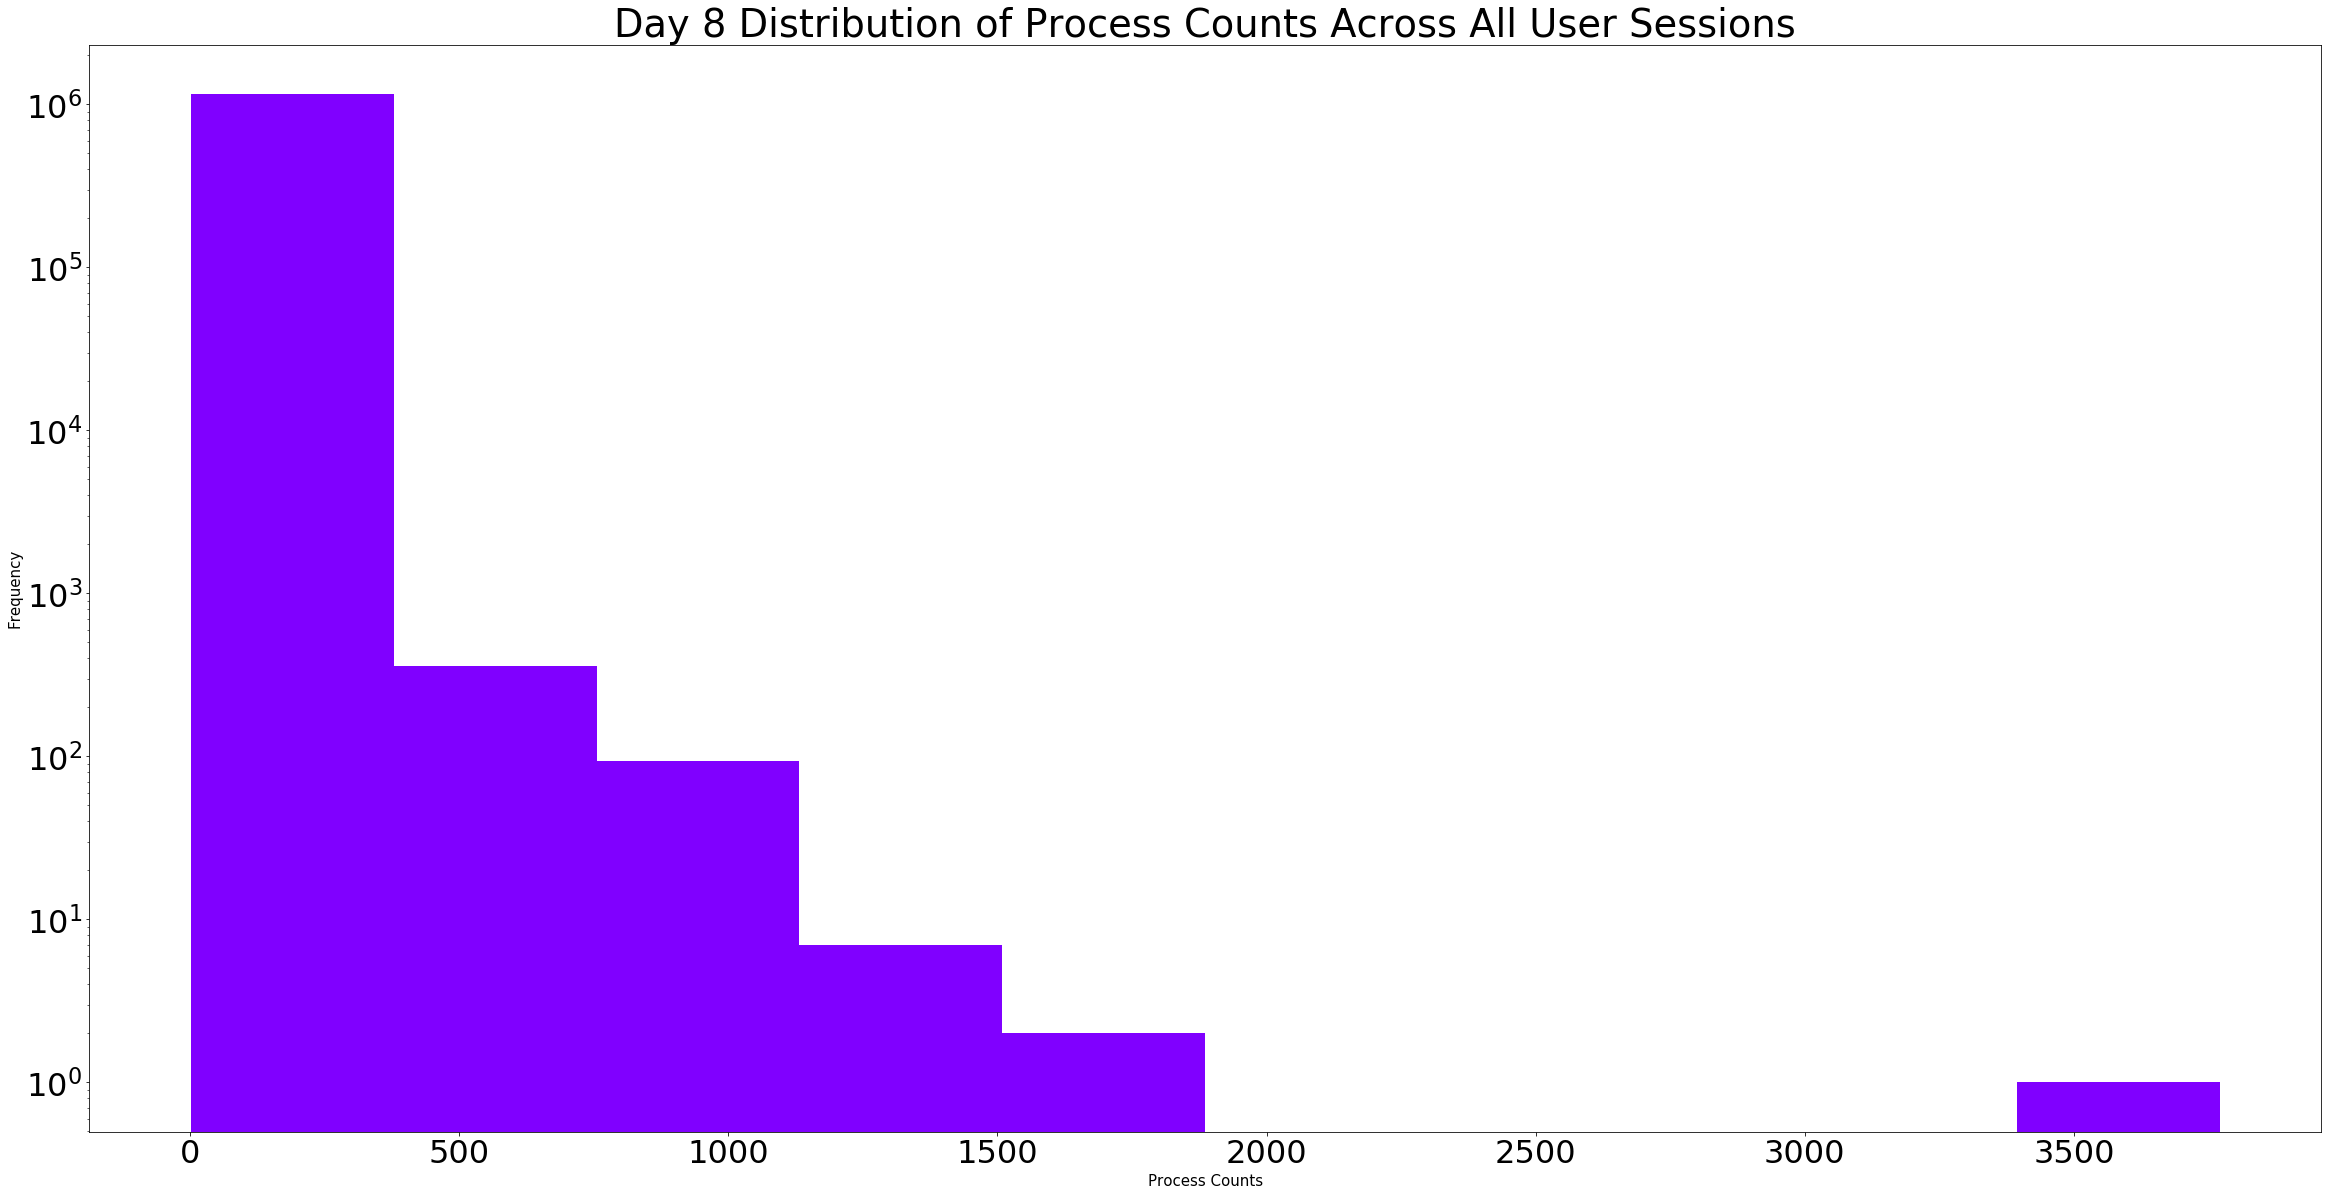

In [150]:
plt.xlabel("Process Counts", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
countDf['ProcCnt'].plot(kind='hist', x='ProcCnt', logy = True, figsize=(40,20), \
             title='Day ' + str(day) + ' Distribution of Process Counts Across All User Sessions', colormap='rainbow')

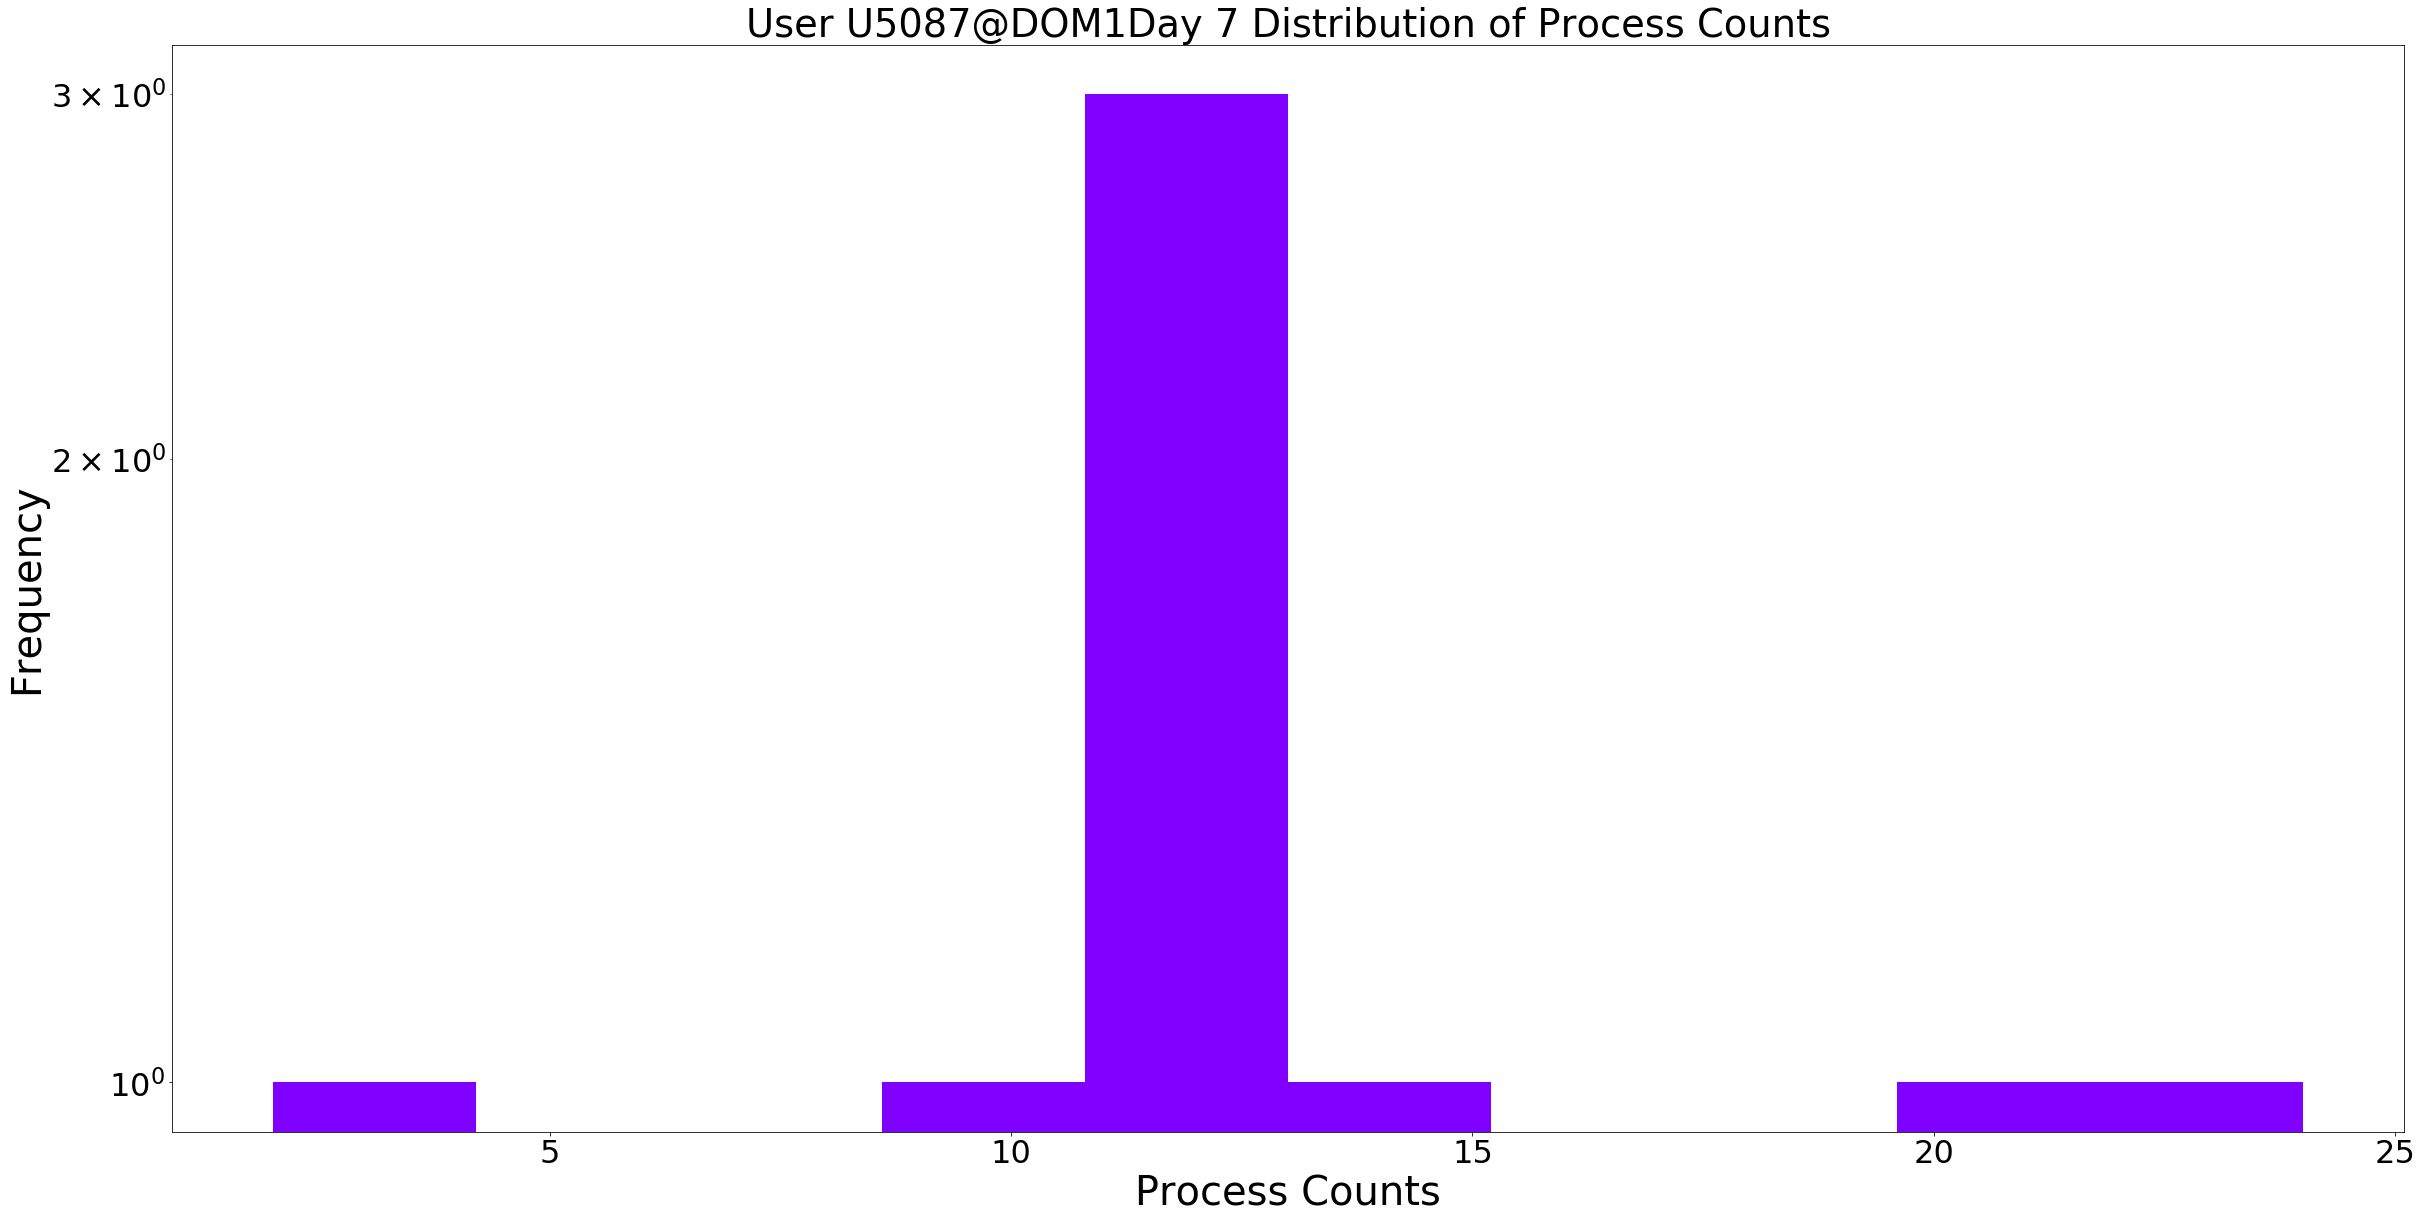

In [159]:
plt.xlabel("Process Counts", fontsize=40)
plt.ylabel("Frequency",fontsize=40)
countDf[countDf['User']==user]['ProcCnt'].plot(kind='hist', x='ProcCnt', logy = True, figsize=(40,20), \
             title='User ' + user + 'Day ' + str(day) + ' Distribution of Process Counts', colormap='rainbow')

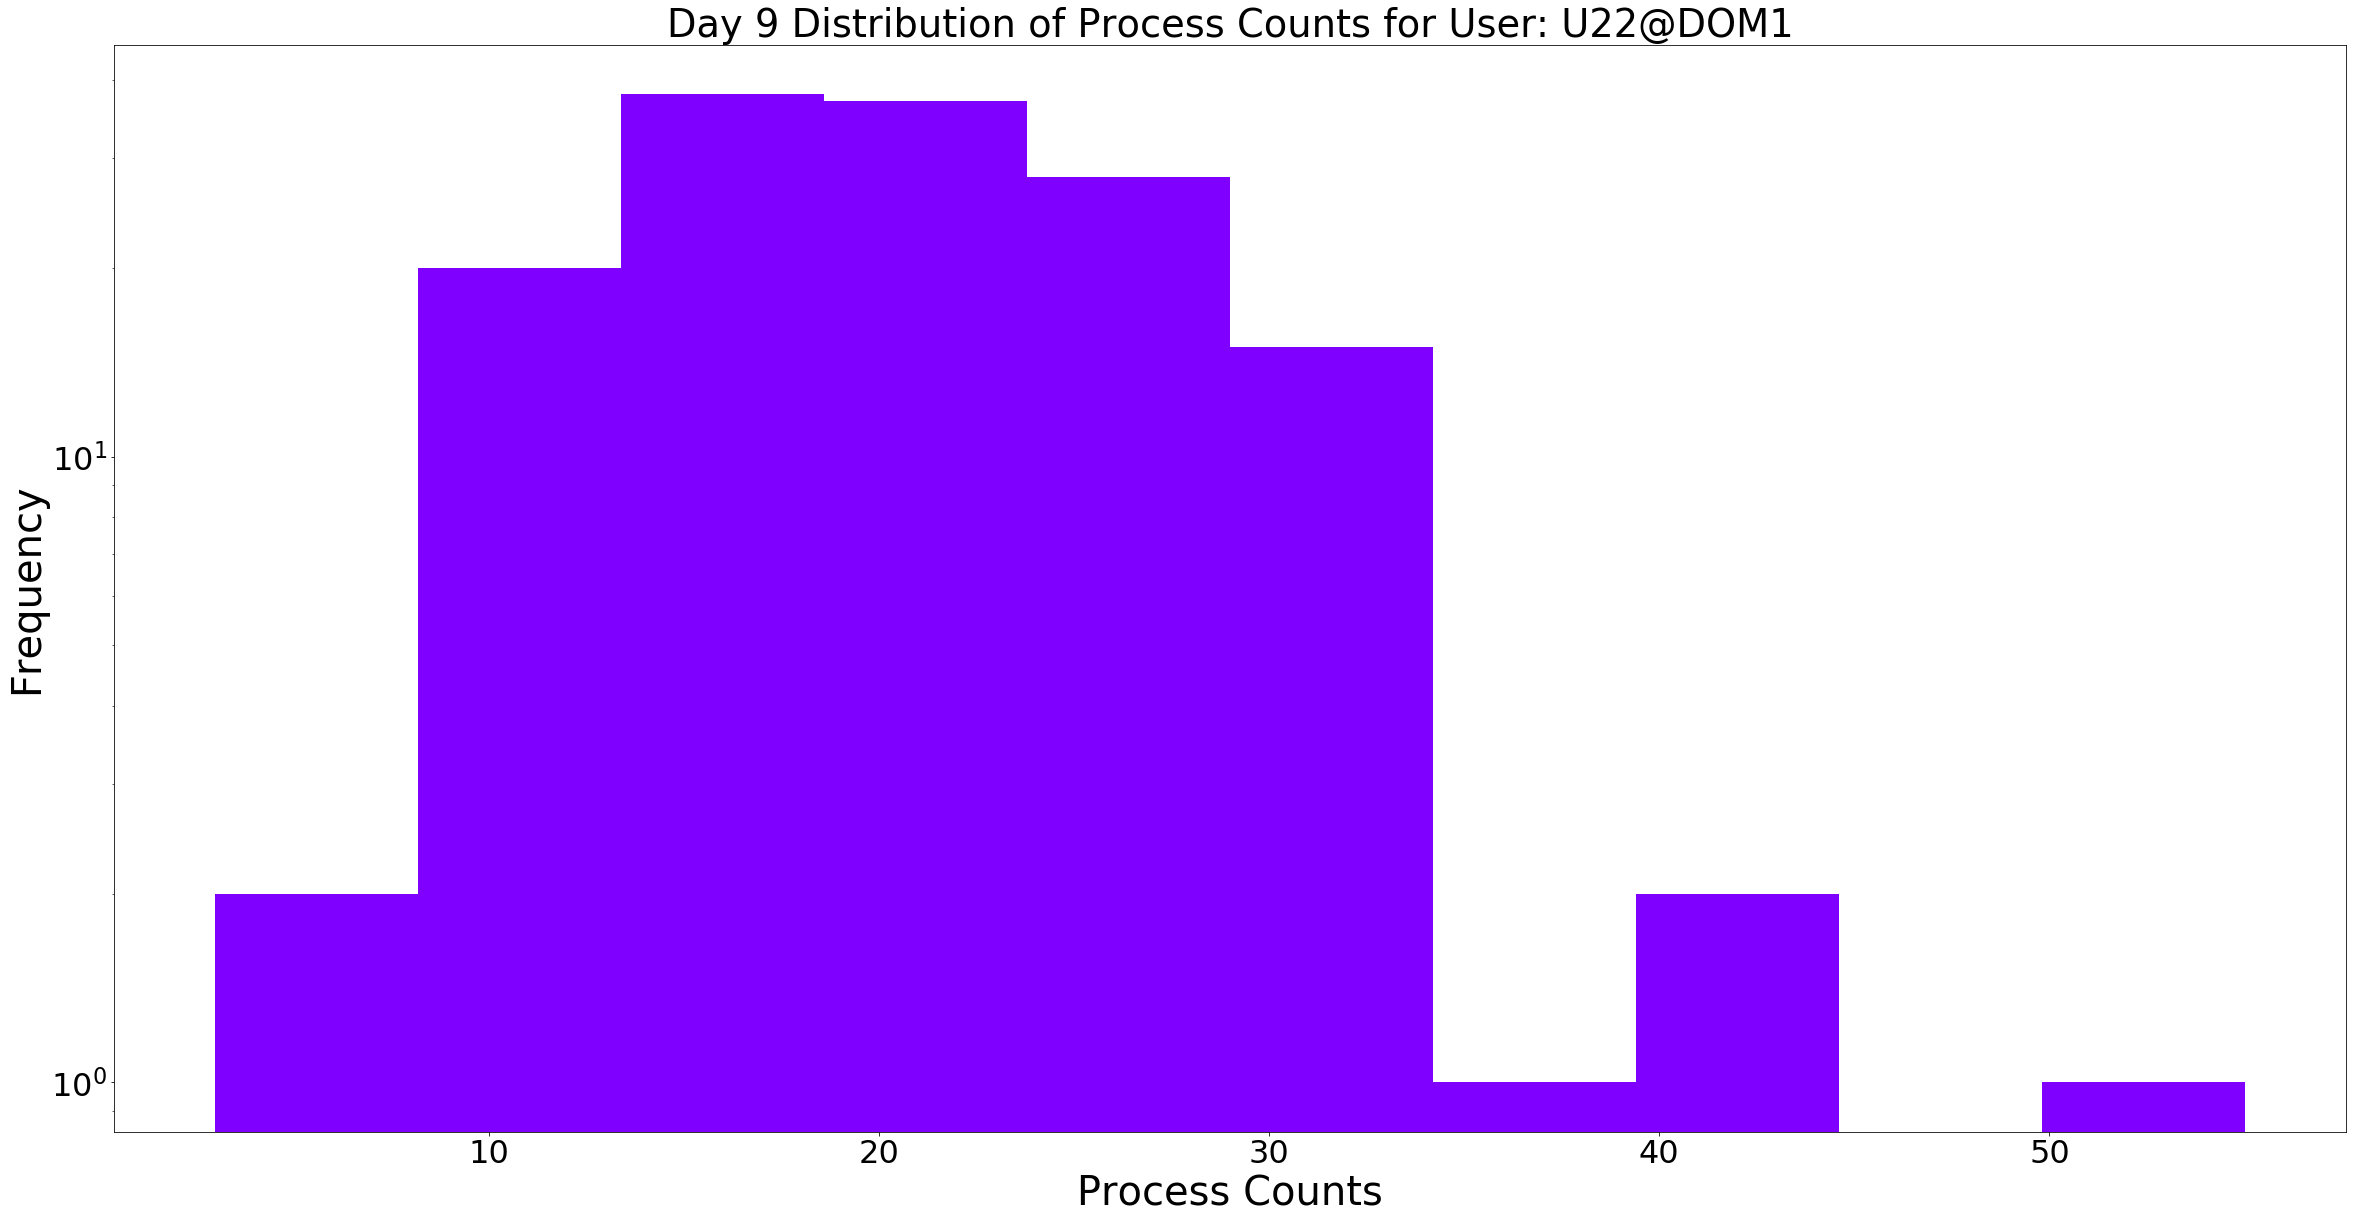

In [132]:
plt.xlabel("Process Counts", fontsize=40)
plt.ylabel("Frequency",fontsize=40)
countDf[countDf['User']=='U22@DOM1']['ProcCnt'].plot(kind='hist', x='ProcCnt', logy = True, figsize=(40,20), \
             title='Day ' + str(day) + ' Distribution of Process Counts for User: U22@DOM1', colormap='rainbow')

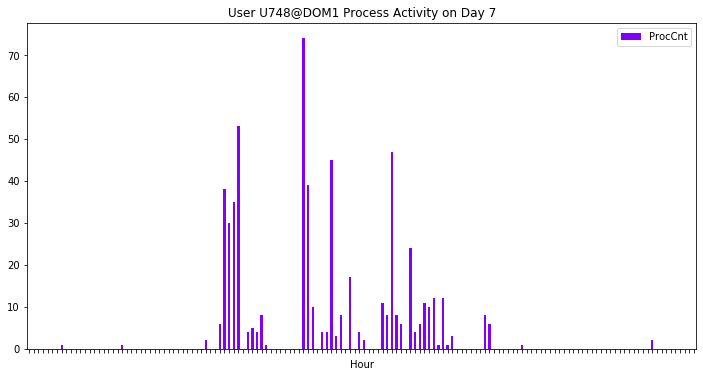

In [39]:
userDf = countDf[countDf['User']==user][['Slice', 'ProcCnt']]
for slice in countDf.Slice.unique():
    if userDf[userDf['Slice']==slice].empty:
        userDf = userDf.append([{'Slice': slice, 'ProcCnt': 0}])
userDf=userDf.sort_values(by='Slice')    
userDf['Hour'] = ''

for hour in range(0,24):
    userDf.loc[userDf['Slice']==hour*6+(144*day), ['Hour']] = hour

userDf.plot(kind='bar', y='ProcCnt', x='Hour', logy = False, figsize=(12,6), \
             title='User ' + user + ' Process Activity on Day ' + str(day), colormap='rainbow', sort_columns=True)

In [133]:
day = 9
user = 'U9947@DOM1'

countDf = pd.read_pickle('D:\\LANL\\2015\\Analysis\\Day_' +  str(day).zfill(2) + '_authFeat.pkl', \
                            compression='gzip')
tempDf = pd.read_pickle('D:\\LANL\\2015\\Analysis\\Day_' +  str(day).zfill(2) + '_procFeat.pkl', \
                            compression='gzip')
sliceRange=countDf.Slice.unique()

countDf = countDf[countDf['User']==user].merge(tempDf[tempDf['User']==user], how='outer', \
                                    left_on=['Slice', 'User'], right_on=['Slice', 'User'])
countDf = countDf.merge(redDf[(redDf['Day']==day) & (redDf['Attacker']==user)], \
                      how='outer', left_on=['Slice'], right_on=['Slice'])

for slice in sliceRange:
    if countDf[countDf['Slice']==slice].empty:
        countDf = countDf.append([{'Slice': slice, 'ProcCnt': 0}])
countDf=countDf.sort_values(by='Slice')    

countDf['Attack'].fillna(False, inplace=True)
countDf['Attack'] = pd.to_numeric(countDf['Attack'])
countDf=countDf.apply(lambda x: x.fillna(0))
countDf=countDf[['Slice', 'DestUserCnt', 'AuthKerberos', \
                 'AuthNTLM', 'AuthMicrosoft', 'AuthNegotiate', 'AuthUnknown', 'LogonNet', \
                 'LogonService', 'LogonClearText', 'LogonBatch', 'LogonInteractive', 'LogonUnlock', \
                 'LogonCreds', 'LogonUnknown', 'OrientLogon', 'OrientLogoff', 'OrientTGS', 'OrientTGT', \
                 'OrientAuthMap', 'ProcCnt',  'Day', 'Attack']]
countDf = countDf.drop_duplicates()


In [134]:
countDf['Hour'] = ''

for hour in range(0,24):
    countDf.loc[countDf['Slice']==hour*6+(day-1)*144, ['Hour']] = hour

In [135]:
for column in range(0,23):
    countDf.iloc[:,column] = countDf.iloc[:,column].apply(lambda x: (x)*1)
countDf = countDf.drop(['Slice', 'Day'], axis=1)

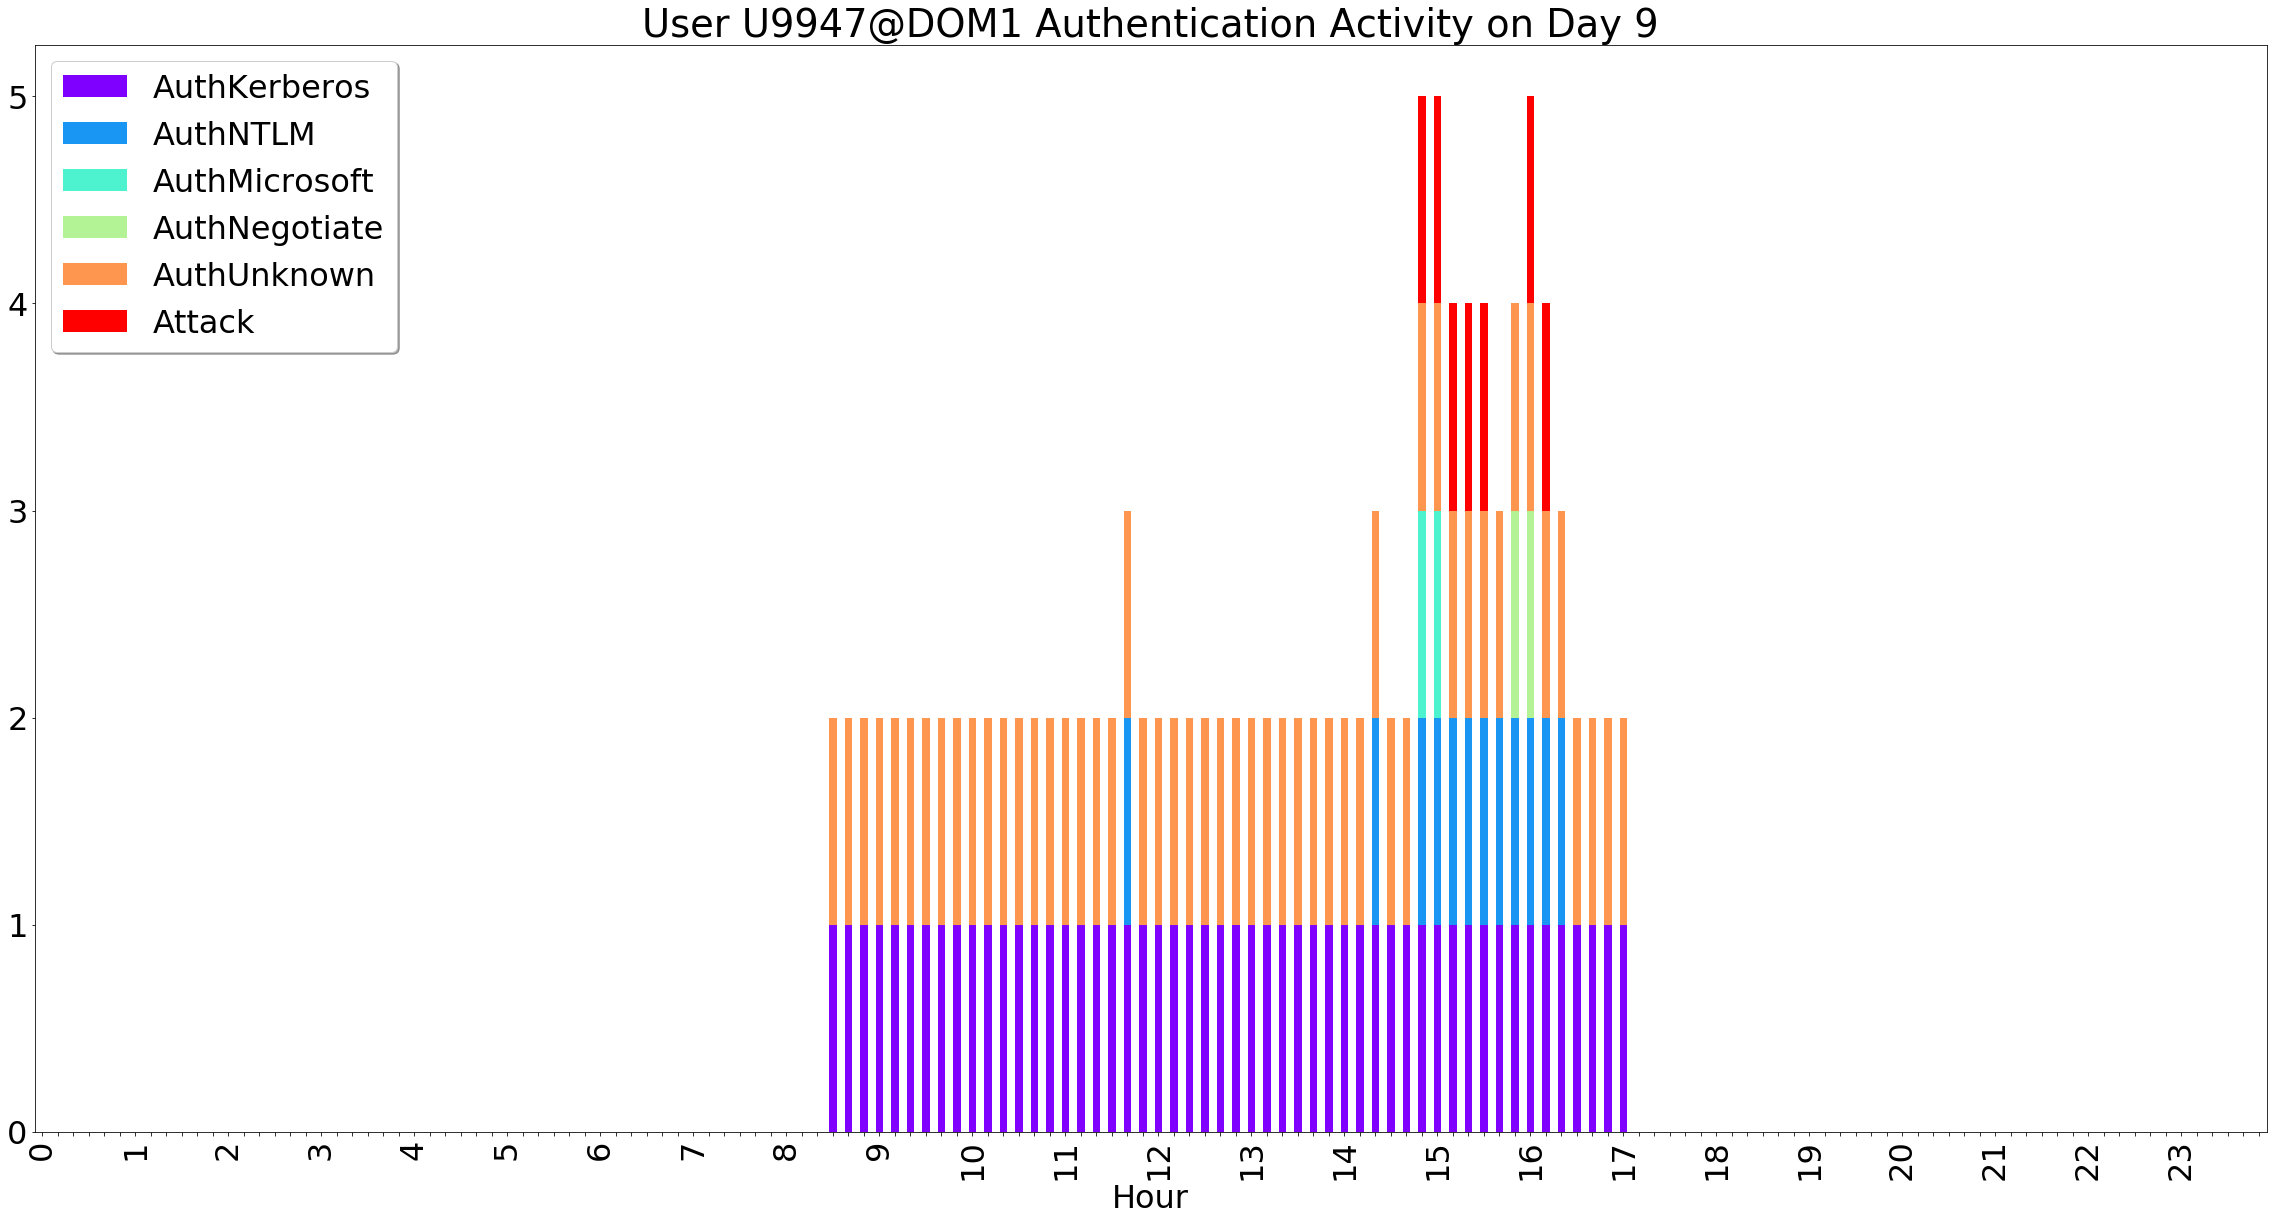

In [140]:
plotDf=countDf[['Hour', 'AuthKerberos', 'AuthNTLM', 'AuthMicrosoft', 'AuthNegotiate', 'AuthUnknown', 'Attack']]
plotDf.plot(kind='bar', stacked=True, x='Hour',  figsize=(40,20), \
             title='User ' + user + ' Authentication Activity on Day ' + str(day), colormap='rainbow')
plt.legend(loc='upper left',  shadow=True, ncol=1)

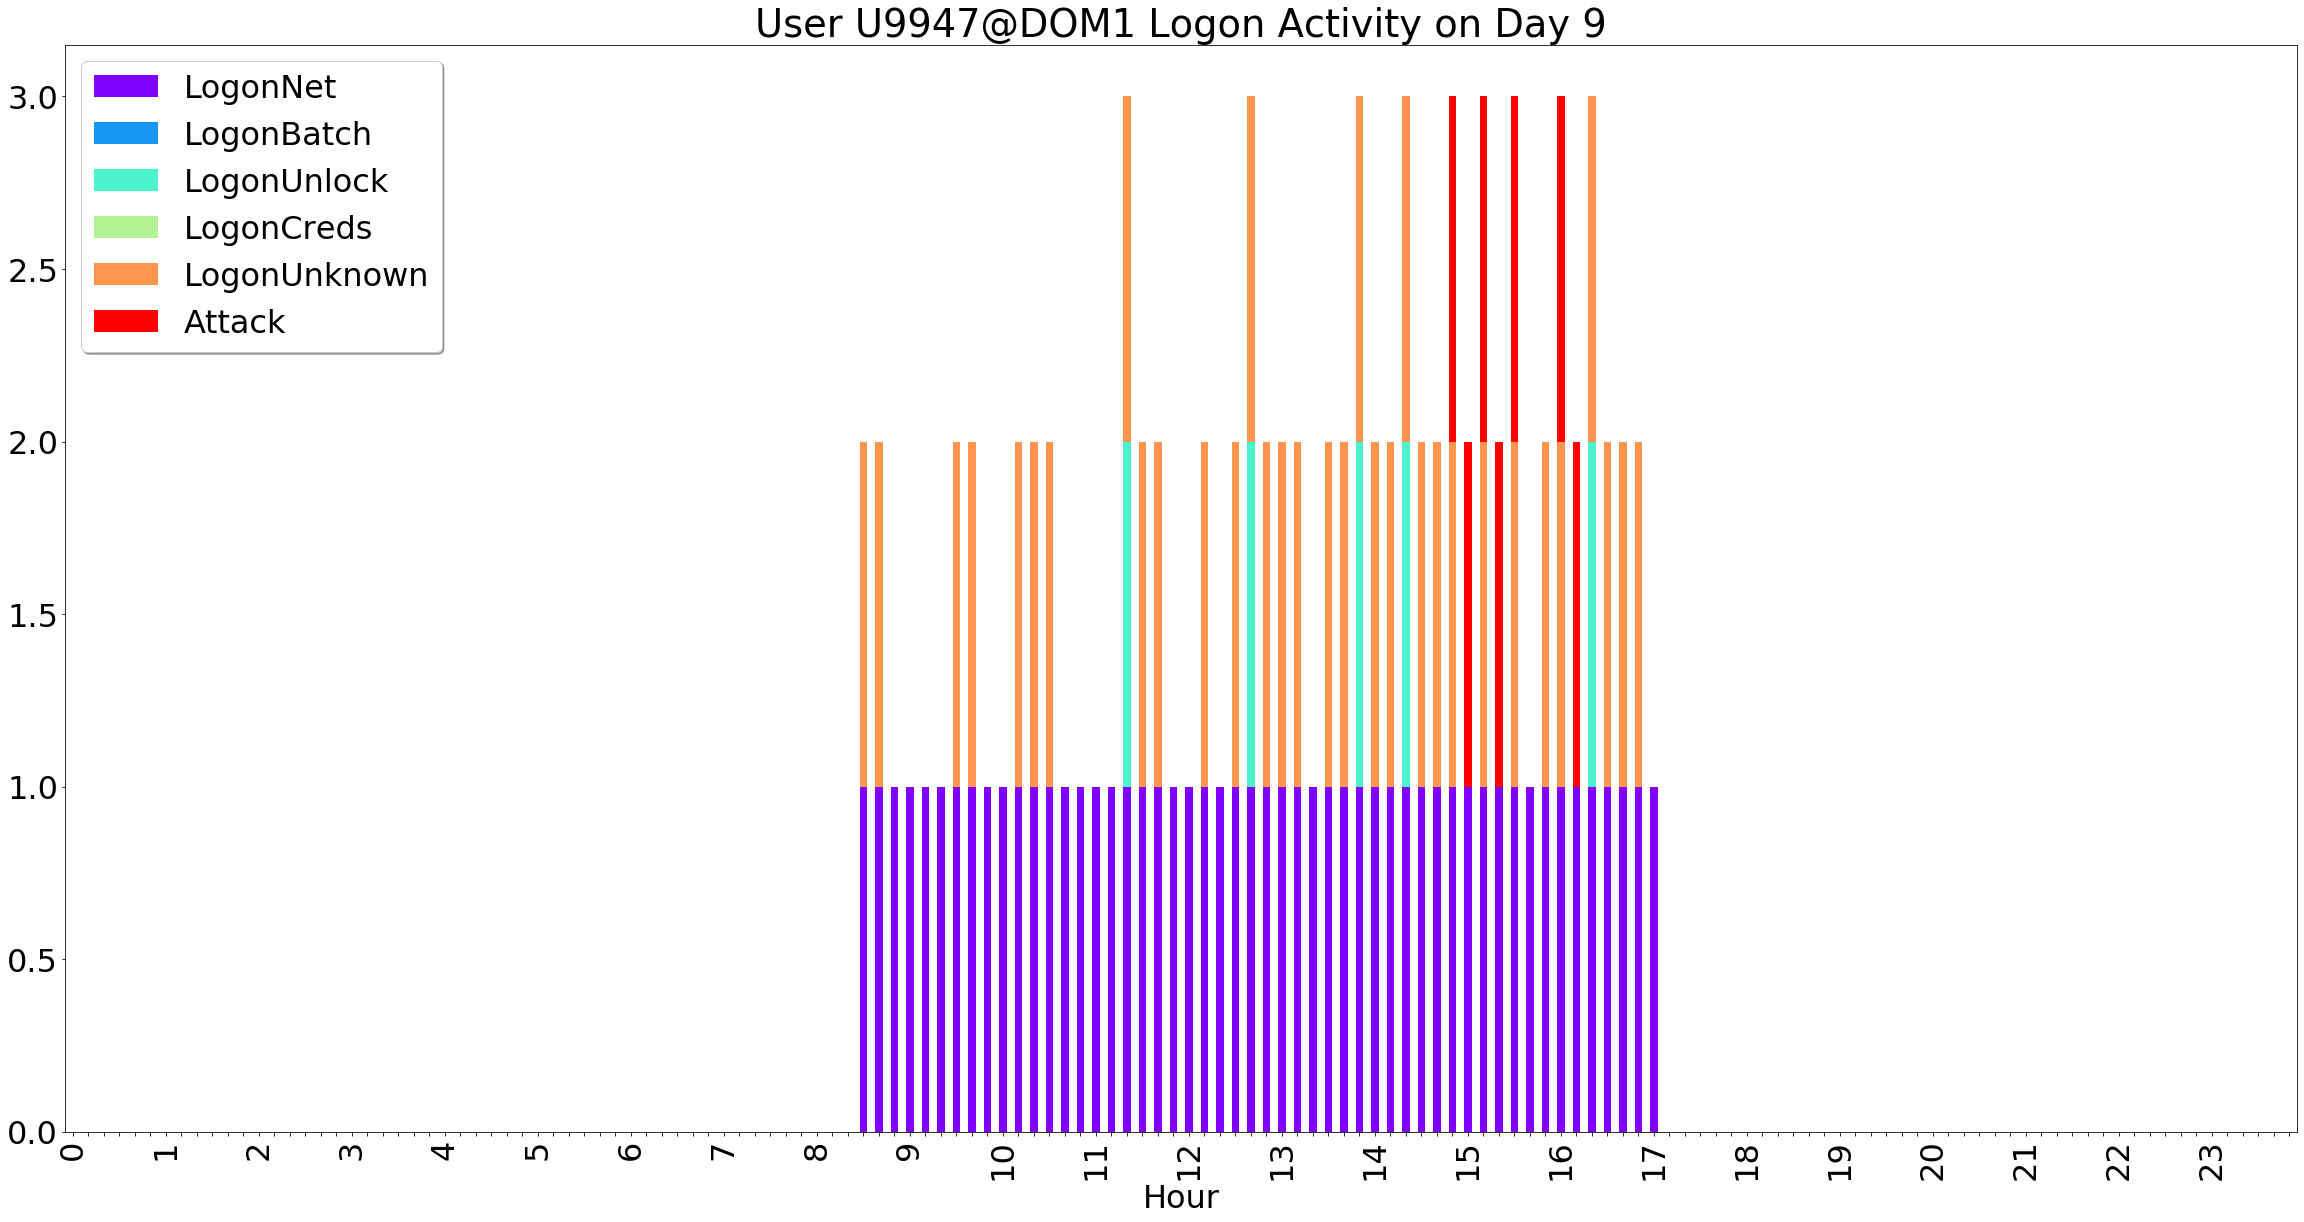

In [137]:
plotDf=countDf[['Hour', 'LogonNet',  'LogonBatch', \
                'LogonUnlock', 'LogonCreds', 'LogonUnknown', 'Attack']]
plotDf.plot(kind='bar', stacked=True, x='Hour',  figsize=(40,20), \
             title='User ' + user + ' Logon Activity on Day ' + str(day), colormap='rainbow')
plt.legend(loc='upper left',  shadow=True, ncol=1)

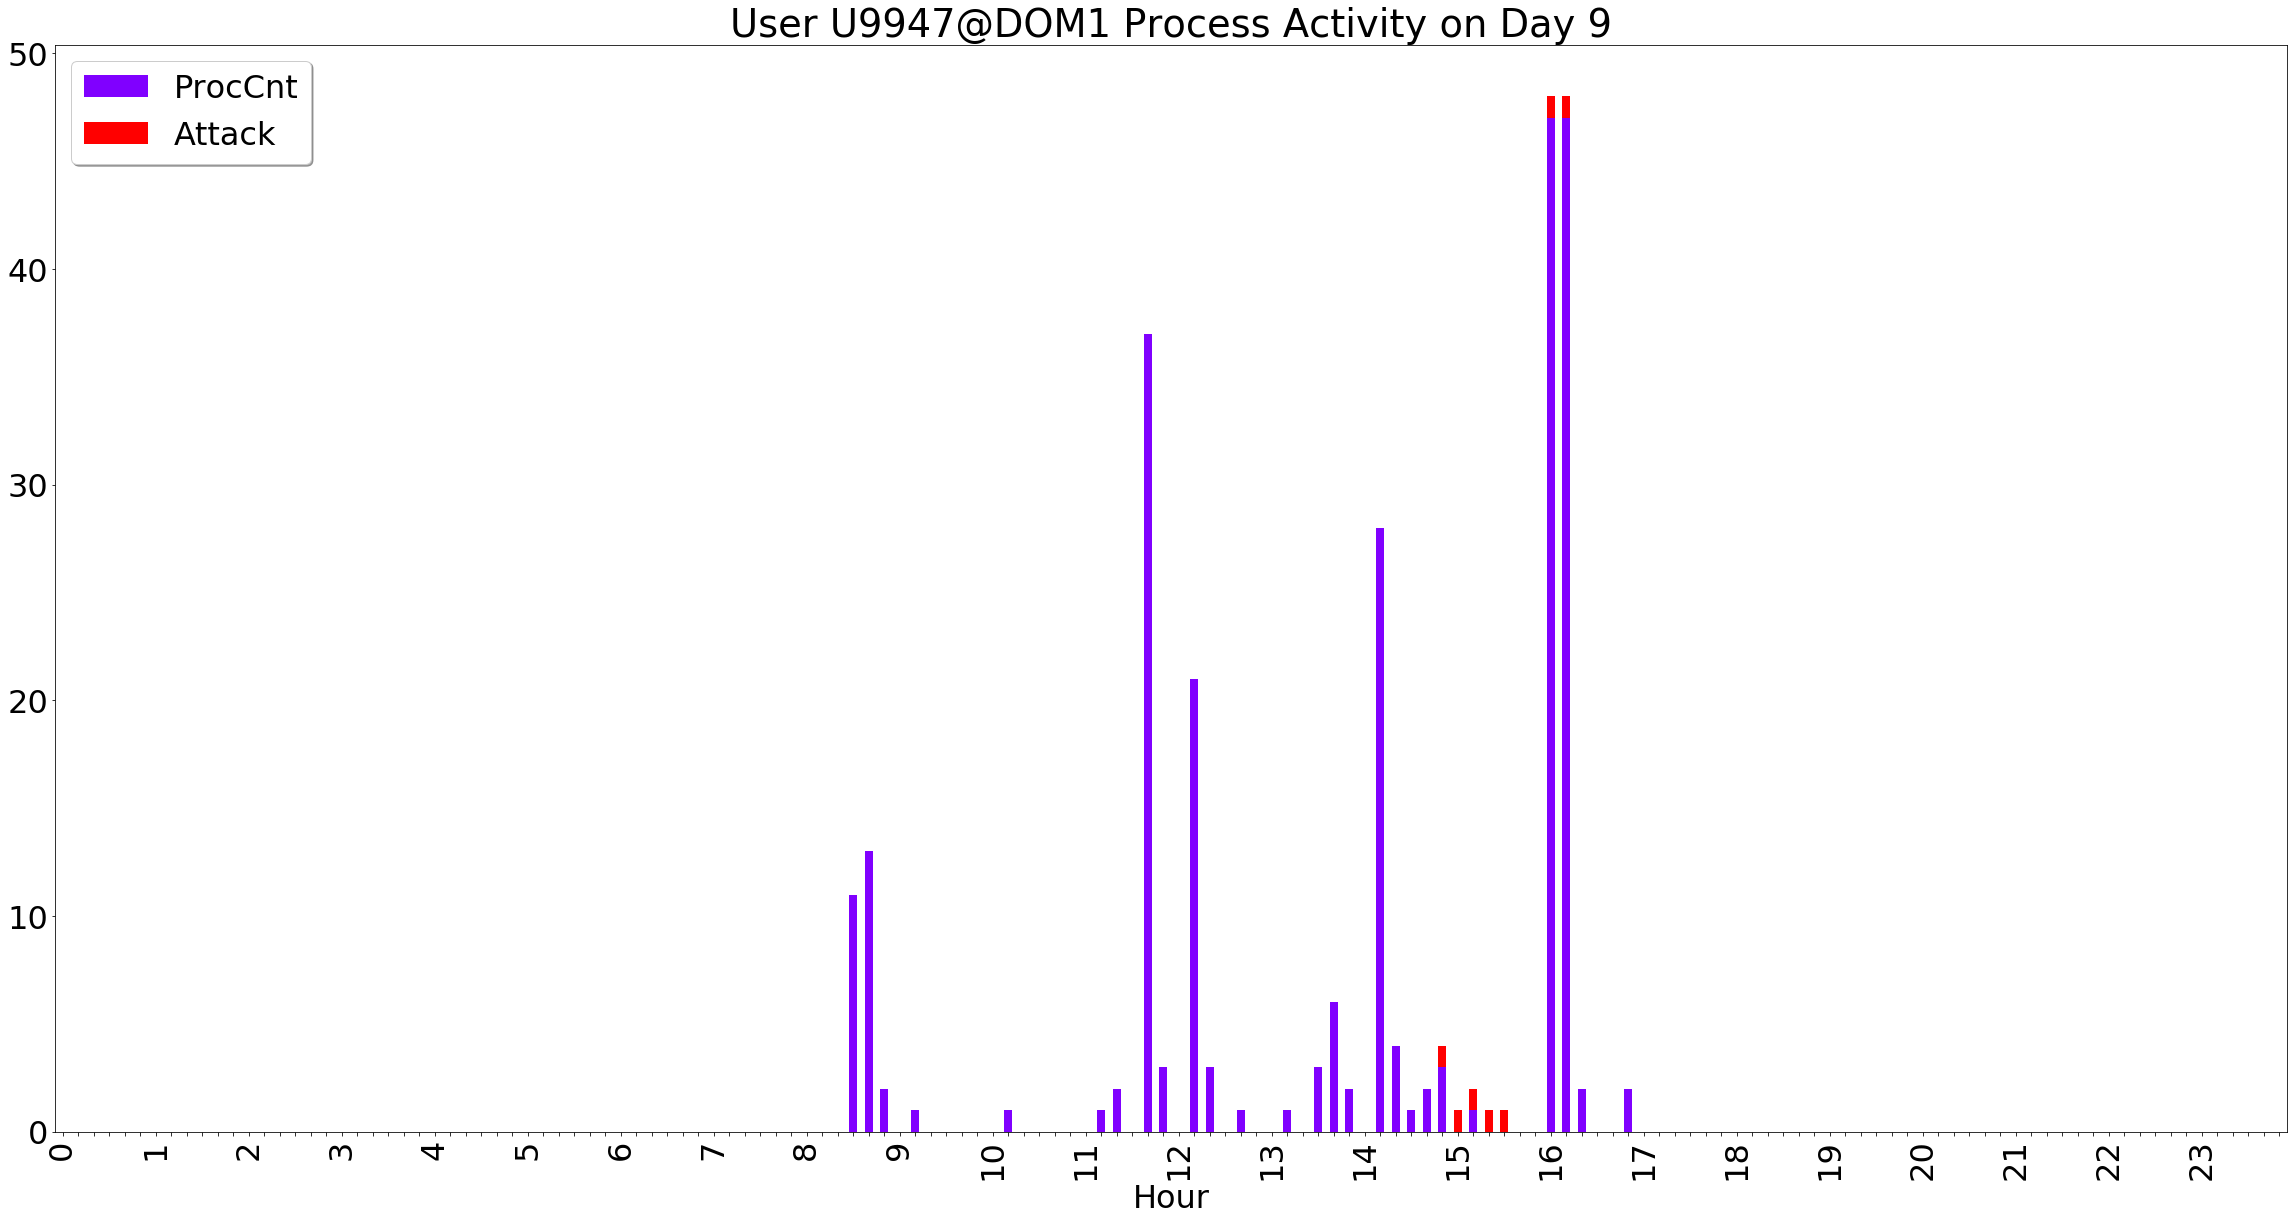

In [138]:
plotDf=countDf[['Hour', 'ProcCnt', 'Attack']]
plotDf.plot(kind='bar', stacked=True, x='Hour',  figsize=(40,20), \
             title='User ' + user + ' Process Activity on Day ' + str(day), colormap='rainbow')
plt.legend(loc='upper left',  shadow=True, ncol=1)

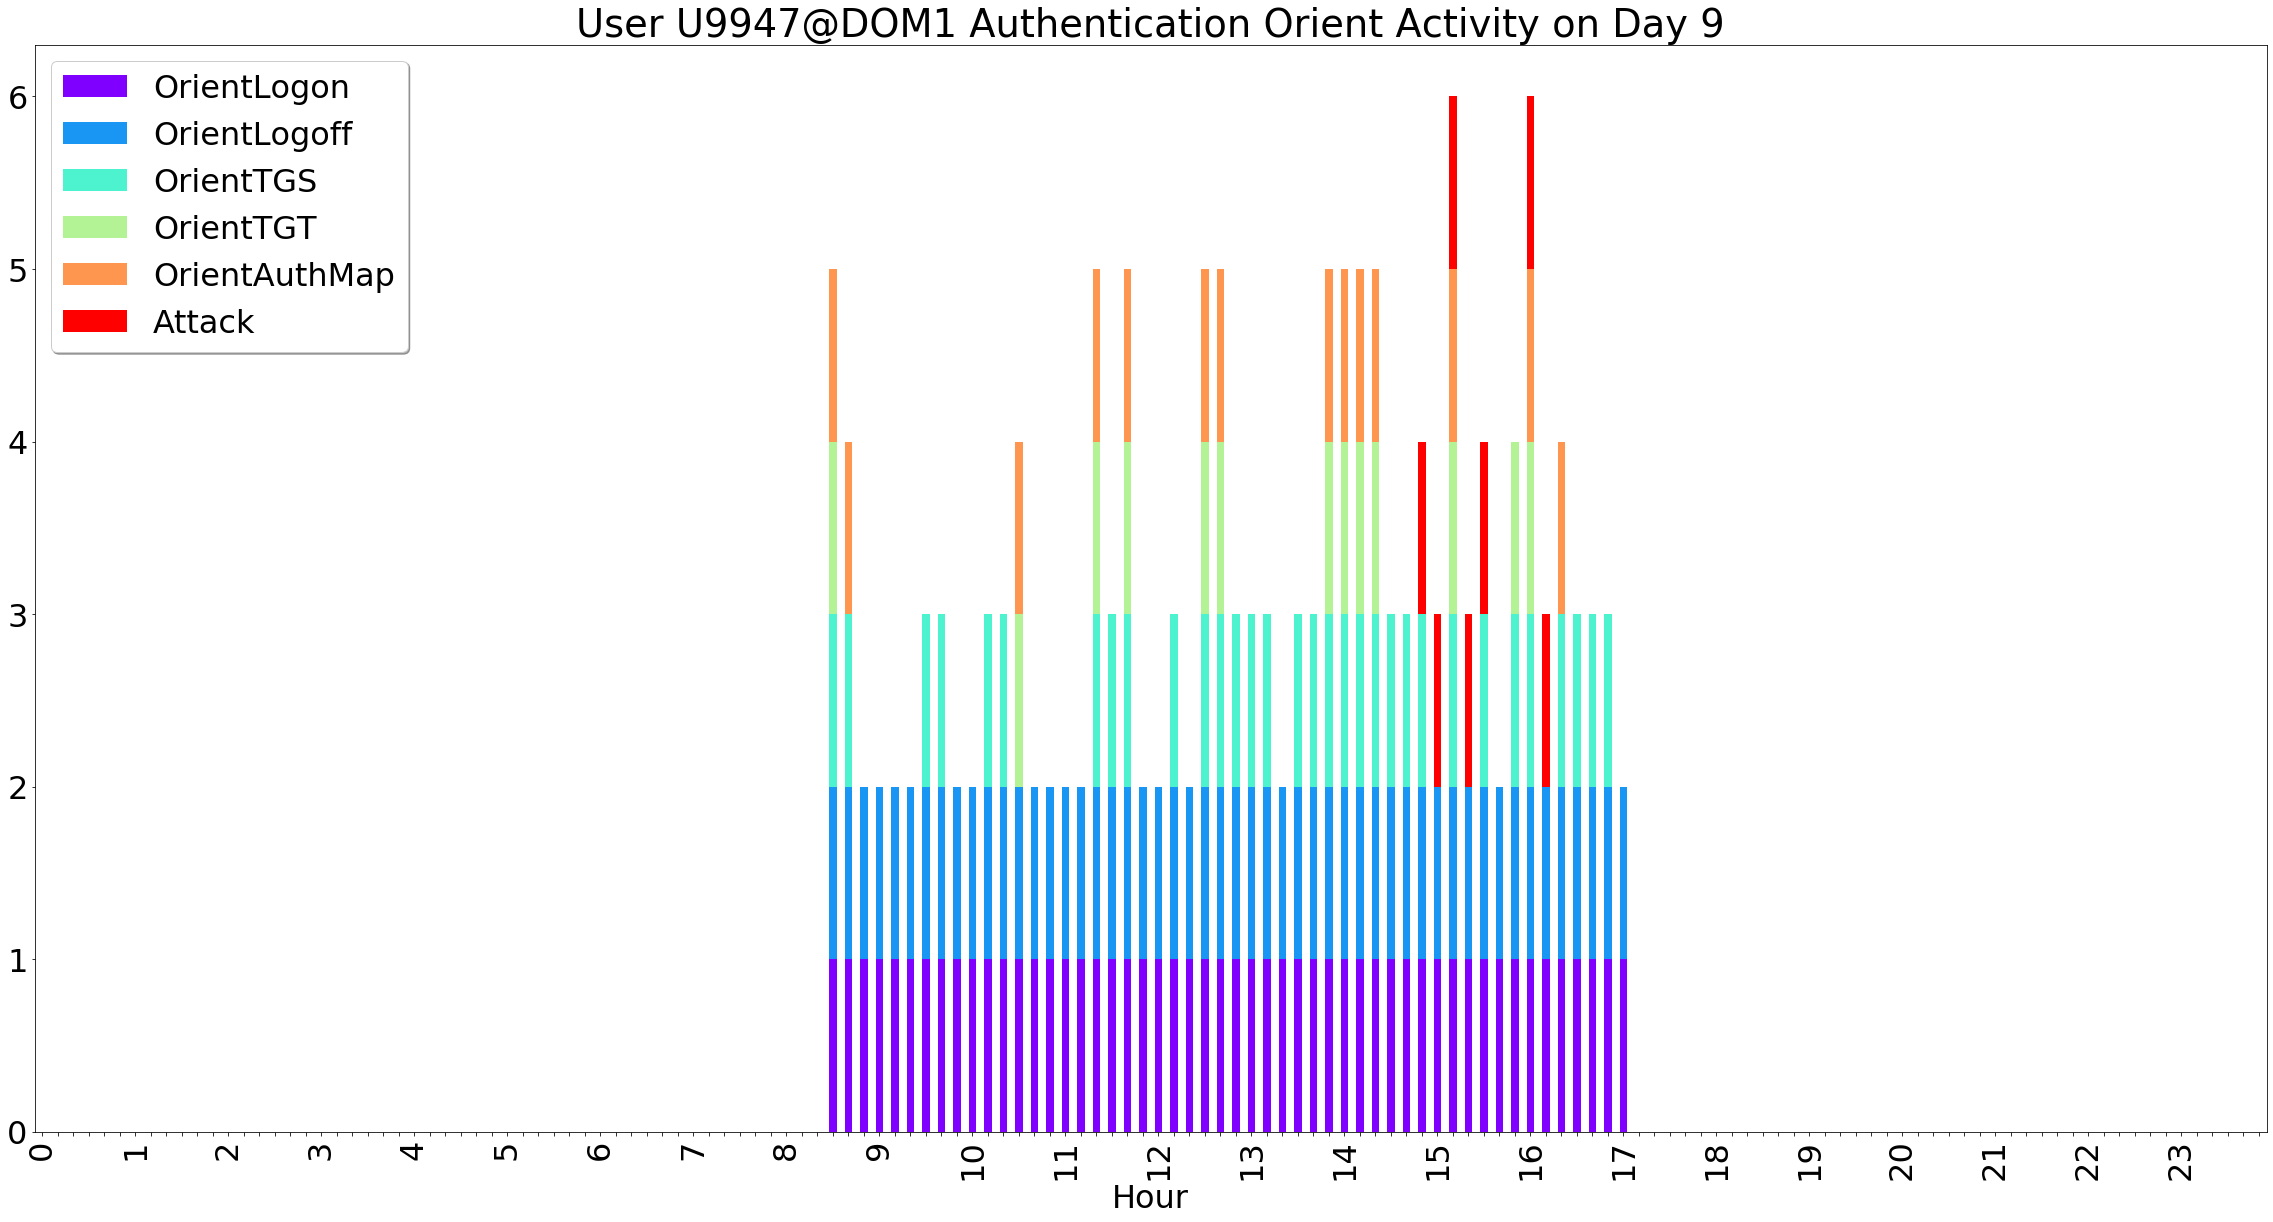

In [139]:
plotDf=countDf[['Hour', 'OrientLogon', 'OrientLogoff', 'OrientTGS', 'OrientTGT', 'OrientAuthMap', 'Attack']]
plotDf.plot(kind='bar', stacked=True, x='Hour',  figsize=(40,20), \
             title='User ' + user + ' Authentication Orient Activity on Day ' + str(day), colormap='rainbow')
plt.legend(loc='upper left',  shadow=True, ncol=1)

In [190]:
redCols = ['Time', 'User', 'SourceComputer', 'DestComputer']
redDf = pd.read_csv(dataDirectory + 'Raw\\redteam.txt.gz', names=redCols)
redDf['Attack'] = 1
y=[]
slice=[]
for slice in range (58*24*6)
    if (redDf[redDf['Time']==second].User.values):
        y.append(1)
    else:
        y.append(0)
plotDf = pd.DataFrame(columns=['Slice', 'Attack'])
plotDf.Slice=slice
plotDf.Attack=y

C:\Users\cjasm\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


In [197]:
attacks = redDf.Time.values

In [198]:
attacks

array([ 150885,  151036,  151648,  151993,  153792,  155219,  155399,
        155460,  155591,  156658,  210086,  210294,  210312,  218418,
        227052,  227408,  227520,  227780,  228024,  228150,  228642,
        228658,  229046,  230395,  234667,  460197,  460711,  460991,
        461842,  463374,  464246,  464254,  464260,  464545,  466195,
        467590,  472248,  472282,  473122,  483455,  483981,  485925,
        486443,  488034,  489614,  491747,  578438,  584551,  584564,
        635015,  725488,  725589,  725983,  726008,  726057,  726137,
        726203,  726347,  726387,  726472,  726973,  726985,  727060,
        727131,  727419,  727619,  727702,  727798,  727888,  728106,
        728138,  728800,  729056,  730430,  730524,  730889,  731101,
        731492,  736582,  736894,  736936,  737011,  737055,  737069,
        737075,  737099,  737108,  737301,  737761,  737908,  738382,
        738711,  738916,  739092,  739214,  739398,  739706,  739734,
        740104,  740

In [200]:
plotDf.plot(kind='bar', y=redDf.Time.values, figsize=(40,20), \
             title='User ' + user + ' Authentication Orient Activity on Day ' + str(day), colormap='rainbow')
plt.legend(loc='upper left',  shadow=True, ncol=1)

IndexError: index 150885 is out of bounds for axis 0 with size 2

In [181]:
redDf[redDf['Time']==150885].User.values

array(['U620@DOM1'], dtype=object)

In [179]:
redDf

,Time,User,SourceComputer,DestComputer,Attack
0,150885,U620@DOM1,C17693,C1003,1
1,151036,U748@DOM1,C17693,C305,1
2,151648,U748@DOM1,C17693,C728,1
3,151993,U6115@DOM1,C17693,C1173,1
4,153792,U636@DOM1,C17693,C294,1
5,155219,U748@DOM1,C17693,C5693,1
6,155399,U748@DOM1,C17693,C152,1
7,155460,U748@DOM1,C17693,C2341,1
8,155591,U748@DOM1,C17693,C332,1
9,156658,U748@DOM1,C17693,C4280,1
